<a href="https://colab.research.google.com/github/Bak-hyeeun/Project_1/blob/main/AI_02_%EB%B0%95%ED%98%9C%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 지역에 따라서 선호하는 게임 장르가 다를까
- 연도별 게임의 트렌드가 있을까
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 데이터 전처리

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df= pd.DataFrame(df)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df_dropna = df.dropna()
df_dropna.shape

(16241, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


**결측치를 어떻게 처리할까?**


16598개의 데이터 중 357개의 결측값을 가진 데이터를 삭제처리함
0.02%의 데이터를 삭제한다고해서 데이터가 편향되거나 데이터의 수가 적어지지 않기 때문
오히려 결측치를 0으로 처리하거나 중간값 등으로 처리하는 것이 옳지 않다고 생각함 

예를 들어, 연도가 결측치인데 이를 임의로 결정하는 것이 오히려 객관적이지 않은 결과를 낳을 수 있다고 생각함

In [ ]:
df = df_dropna

In [ ]:
NA_Sales_L = df['NA_Sales'].values.tolist()
NA_Sales_L

['0.04',
 '0.17',
 '0',
 '0.04',
 '0.12',
 '0',
 '0.02',
 '0.07',
 '0',
 '0.04',
 '480K',
 '0.14',
 '0',
 '0.02',
 '0',
 '0.14',
 '0.01',
 '0',
 '0.02',
 '0',
 '0.57',
 '0.06',
 '0.08',
 '0',
 '0.48',
 '0.02',
 '0.03',
 '0',
 '0',
 '0.14',
 '0.05',
 '0.12',
 '0',
 '0.29',
 '0.19',
 '0.3',
 '0.26',
 '0.11',
 '0.18',
 '0.3',
 '0',
 '0.33',
 '0',
 '0.51',
 '60K',
 '0',
 '0.06',
 '0.13',
 '0.14',
 '0.18',
 '0',
 '0.34',
 '0.05',
 '0.25',
 '0',
 '0',
 '0.41',
 '0.18',
 '0.02',
 '0.25',
 '0.13',
 '0.08',
 '0.01',
 '0',
 '0.52',
 '0.04',
 '0.08',
 '0.18',
 '0.22',
 '0.03',
 '0.08',
 '0.22',
 '0.01',
 '0.08',
 '0',
 '0.35',
 '0.1',
 '0',
 '0.08',
 '0.1',
 '0',
 '0.19',
 '0.13',
 '0.17',
 '0',
 '0.08',
 '0.13',
 '0.22',
 '0.07',
 '0.17',
 '0.67',
 '0.05',
 '0',
 '0.07',
 '0.02',
 '0.59',
 '0.36',
 '0',
 '0',
 '0.18',
 '0',
 '0.05',
 '0.21',
 '0.06',
 '0.19',
 '1.19',
 '0',
 '0',
 '0.01',
 '0',
 '0.04',
 '0.04',
 '0',
 '0.04',
 '0',
 '0.03',
 '0',
 '0',
 '0.07',
 '5.91',
 '0.04',
 '0',
 '0',
 '1

In [ ]:
range(len(NA_Sales_L))

range(0, 16241)

In [ ]:
#연습

kk = ['0.02','0.03R','0.08U']

result = []
for k in range(len(kk)):
  if kk[k][-1] == 'R':
    j = kk[[k][-1]].replace('R','')
    result.append(float(j)*1000)
  elif kk[k][-1] == 'U':
    j = kk[[k][-1]].replace('U','')
    result.append(float(j)*1000)
  else:
    result.append(float(kk[[k][-1]])*2000)

print(result)

[40.0, 30.0, 80.0]


In [ ]:
#NA_Sales 단위 변경하기 

NA_Sales_L = df['NA_Sales'].values.tolist()

range(len(NA_Sales_L))

result1 = []
for k in range(len(NA_Sales_L)):
  if NA_Sales_L[k][-1] == 'K':
    i = NA_Sales_L[[k][-1]].replace('K','')
    result1.append(float(i) * 1000)
  elif NA_Sales_L[k][-1] == 'M':
    i = NA_Sales_L[[k][-1]].replace('M','')
    result1.append(float(i) * 1000000)
  else:
    result1.append(float(NA_Sales_L[[k][-1]]) * 1000000)

result1

[40000.0,
 170000.0,
 0.0,
 40000.0,
 120000.0,
 0.0,
 20000.0,
 70000.0,
 0.0,
 40000.0,
 480000.0,
 140000.0,
 0.0,
 20000.0,
 0.0,
 140000.0,
 10000.0,
 0.0,
 20000.0,
 0.0,
 570000.0,
 60000.0,
 80000.0,
 0.0,
 480000.0,
 20000.0,
 30000.0,
 0.0,
 0.0,
 140000.0,
 50000.0,
 120000.0,
 0.0,
 290000.0,
 190000.0,
 300000.0,
 260000.0,
 110000.0,
 180000.0,
 300000.0,
 0.0,
 330000.0,
 0.0,
 510000.0,
 60000.0,
 0.0,
 60000.0,
 130000.0,
 140000.0,
 180000.0,
 0.0,
 340000.0,
 50000.0,
 250000.0,
 0.0,
 0.0,
 410000.0,
 180000.0,
 20000.0,
 250000.0,
 130000.0,
 80000.0,
 10000.0,
 0.0,
 520000.0,
 40000.0,
 80000.0,
 180000.0,
 220000.0,
 30000.0,
 80000.0,
 220000.0,
 10000.0,
 80000.0,
 0.0,
 350000.0,
 100000.0,
 0.0,
 80000.0,
 100000.0,
 0.0,
 190000.0,
 130000.0,
 170000.0,
 0.0,
 80000.0,
 130000.0,
 220000.0,
 70000.0,
 170000.0,
 670000.0,
 50000.0,
 0.0,
 70000.0,
 20000.0,
 590000.0,
 360000.0,
 0.0,
 0.0,
 180000.0,
 0.0,
 50000.0,
 210000.0,
 60000.0,
 190000.0,
 1190000

In [ ]:
#EU_Sales 단위 변경하기

EU_Sales_L = df['EU_Sales'].values.tolist()

result2 = []
for k in range(len(EU_Sales_L)):
  if EU_Sales_L[k][-1] == 'K':
    i = EU_Sales_L[[k][-1]].replace('K','')
    result2.append(float(i) * 1000)
  elif EU_Sales_L[k][-1] == 'M':
    i = EU_Sales_L[[k][-1]].replace('M','')
    result2.append(float(i) * 1000000)
  else:
    result2.append(float(EU_Sales_L[[k][-1]]) * 1000000)

result2

[0.0,
 0.0,
 0.0,
 0.0,
 90000.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 30000.0,
 330000.0,
 50000.0,
 20000.0,
 0.0,
 0.0,
 160000.0,
 20000.0,
 0.0,
 0.0,
 20000.0,
 450000.0,
 40000.0,
 20000.0,
 10000.0,
 530000.0,
 10000.0,
 20000.0,
 230000.0,
 0.0,
 100000.0,
 0.0,
 10000.0,
 0.0,
 220000.0,
 200000.0,
 30000.0,
 10000.0,
 10000.0,
 50000.0,
 200000.0,
 20000.0,
 50000.0,
 0.0,
 330000.0,
 80000.0,
 0.0,
 50000.0,
 20000.0,
 90000.0,
 0.0,
 0.0,
 260000.0,
 0.0,
 70000.0,
 40000.0,
 0.0,
 110000.0,
 0.0,
 20000.0,
 170000.0,
 100000.0,
 40000.0,
 0.0,
 0.0,
 60000.0,
 10000.0,
 140000.0,
 0.0,
 50000.0,
 10000.0,
 70000.0,
 60000.0,
 120000.0,
 0.0,
 0.0,
 240000.0,
 0.0,
 0.0,
 30000.0,
 70000.0,
 0.0,
 50000.0,
 30000.0,
 130000.0,
 0.0,
 20000.0,
 210000.0,
 150000.0,
 20000.0,
 0.0,
 300000.0,
 40000.0,
 40000.0,
 20000.0,
 0.0,
 160000.0,
 210000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20000.0,
 0.0,
 20000.0,
 50000.0,
 70000.0,
 0.0,
 0.0,
 90000.0,
 0.0,
 0.0,
 30000.0,
 30000.0,
 0.0,
 0.0,

In [ ]:
#JP_Sales 단위 변경하기 

JP_Sales_L = df['JP_Sales'].values.tolist()

result3 = []
for k in range(len(JP_Sales_L)):
  if JP_Sales_L[k][-1] == 'K':
    i = JP_Sales_L[[k][-1]].replace('K','')
    result3.append(float(i) * 1000)
  elif JP_Sales_L[k][-1] == 'M':
    i = JP_Sales_L[[k][-1]].replace('M','')
    result3.append(float(i) * 1000000)
  else:
    result3.append(float(JP_Sales_L[[k][-1]]) * 1000000)

result3

[0.0,
 0.0,
 20000.0,
 0.0,
 0.0,
 140000.0,
 0.0,
 110000.0,
 40000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20000.0,
 0.0,
 0.0,
 30000.0,
 30000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 0.0,
 80000.0,
 0.0,
 0.0,
 20000.0,
 10000.0,
 0.0,
 0.0,
 40000.0,
 0.0,
 0.0,
 0.0,
 300000.0,
 0.0,
 250000.0,
 50000.0,
 10000.0,
 160000.0,
 120000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 70000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 30000.0,
 0.0,
 850000.0,
 0.0,
 10000.0,
 40000.0,
 0.0,
 0.0,
 370000.0,
 410000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 510000.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 140000.0,
 0.0,
 0.0,
 0.0,
 890000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10000.0,
 1170000.0,
 80000.0,
 0.0,
 130000.0,
 0.0,
 20000.0,
 0.0,
 0.0,
 50000.0,
 120000.0,
 20000.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 170000.0,
 0.0,
 30000.0,
 40000.0,
 130000.0,
 130000.0,
 0.0,
 20000.0,
 0.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 10

In [ ]:
#Other_Sales 단위 변경하기 

Other_Sales_L = df['Other_Sales'].values.tolist()

result4 = []
for k in range(len(Other_Sales_L)):
  if Other_Sales_L[k][-1] == 'K':
    i = Other_Sales_L[[k][-1]].replace('K','')
    result4.append(float(i) * 1000)
  elif Other_Sales_L[k][-1] == 'M':
    i = Other_Sales_L[[k][-1]].replace('M','')
    result4.append(float(i) * 1000000)
  else:
    result4.append(float(Other_Sales_L[[k][-1]]) * 1000000)

result4

[0.0,
 10000.0,
 0.0,
 0.0,
 40000.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 10000.0,
 60000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 60000.0,
 10000.0,
 0.0,
 0.0,
 0.0,
 150000.0,
 10000.0,
 0.0,
 0.0,
 230000.0,
 0.0,
 0.0,
 60000.0,
 0.0,
 20000.0,
 0.0,
 10000.0,
 0.0,
 80000.0,
 50000.0,
 30000.0,
 0.0,
 10000.0,
 10000.0,
 60000.0,
 10000.0,
 40000.0,
 0.0,
 80000.0,
 30000.0,
 0.0,
 20000.0,
 20000.0,
 20000.0,
 10000.0,
 0.0,
 100000.0,
 0.0,
 30000.0,
 10000.0,
 0.0,
 40000.0,
 0.0,
 10000.0,
 50000.0,
 20000.0,
 10000.0,
 0.0,
 0.0,
 50000.0,
 0.0,
 50000.0,
 10000.0,
 0.0,
 0.0,
 10000.0,
 10000.0,
 30000.0,
 10000.0,
 0.0,
 40000.0,
 10000.0,
 0.0,
 0.0,
 10000.0,
 10000.0,
 10000.0,
 0.0,
 40000.0,
 0.0,
 0.0,
 80000.0,
 30000.0,
 20000.0,
 10000.0,
 100000.0,
 20000.0,
 10000.0,
 0.0,
 0.0,
 10000.0,
 60000.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 20000.0,
 0.0,
 10000.0,
 200000.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 10000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20000.0,
 900000.0,
 0.0,
 0.0,
 0

In [ ]:
df = df.drop(['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis =1)
df

,Name,Platform,Year,Genre,Publisher
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei


In [ ]:
df['NA_Sales'] = result1
df['EU_Sales'] = result2
df['JP_Sales'] = result3
df['Other_Sales'] = result4
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [ ]:
df['Genre'].drop_duplicates()

0           Action
2        Adventure
3             Misc
4         Platform
5           Sports
6       Simulation
10          Racing
12    Role-Playing
13          Puzzle
16        Strategy
24        Fighting
27         Shooter
Name: Genre, dtype: object

In [ ]:
#genre_grouped = df.groupby('Genre')

In [ ]:
obs1 = pd.crosstab(df['Genre'], df['NA_Sales'])
obs1

NA_Sales,0.0,10000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,390000.0,...,6160000.0,6420000.0,6630000.0,6720000.0,6750000.0,6760000.0,6820000.0,6850000.0,6910000.0,6990000.0,7010000.0,7030000.0,7280000.0,7970000.0,8250000.0,8410000.0,8520000.0,8940000.0,9000000.0,9030000.0,9070000.0,9090000.0,9430000.0,9540000.0,9630000.0,9670000.0,9810000.0,10830000.0,11270000.0,11380000.0,12780000.0,14030000.0,14590000.0,14970000.0,15750000.0,15850000.0,23200000.0,26930000.0,29080000.0,41490000.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,724,82,106,109,103,100,78,88,92,85,85,82,73,71,67,62,50,56,46,39,38,41,41,24,29,28,35,25,23,19,18,27,19,15,20,18,19,13,14,14,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adventure,732,33,31,38,27,33,33,38,31,20,16,21,15,9,14,11,9,12,7,8,5,4,6,6,8,3,3,7,2,3,5,2,1,4,2,3,2,3,3,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fighting,251,21,16,27,23,27,30,17,14,23,14,16,9,18,13,13,10,8,7,10,6,8,6,11,4,3,9,6,3,6,10,7,6,3,3,6,5,4,5,4,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Misc,522,45,33,41,49,46,44,47,52,44,54,35,36,43,31,24,27,22,21,29,18,12,16,11,14,23,10,14,14,9,8,7,5,13,3,5,7,8,2,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
Platform,83,28,36,28,31,36,27,24,23,24,31,14,23,20,12,9,15,10,13,13,10,11,11,7,6,10,9,6,3,5,5,7,9,11,6,4,3,4,2,6,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0
Puzzle,131,39,38,30,30,28,20,27,14,11,15,16,8,16,9,4,6,9,7,2,3,1,2,0,1,4,6,2,3,5,4,2,2,0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Racing,137,62,55,67,49,45,52,51,40,44,32,37,30,20,19,17,13,13,22,13,15,12,15,17,14,13,8,11,4,8,4,6,10,5,6,13,7,8,3,6,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Role-Playing,617,31,37,33,39,36,42,47,36,32,29,17,18,23,28,16,23,13,15,15,13,10,15,11,5,10,7,3,8,8,3,6,13,8,4,4,5,9,3,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Shooter,159,57,51,52,50,49,46,38,35,30,28,24,25,24,24,14,13,20,12,12,12,18,13,10,11,17,11,4,15,12,9,7,10,11,13,7,9,6,11,7,...,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
obs2 = pd.crosstab(df['Genre'], df['EU_Sales'])
obs2

EU_Sales,0.0,10000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,390000.0,...,3750000.0,3760000.0,3870000.0,3900000.0,3910000.0,4280000.0,4290000.0,4300000.0,4320000.0,4440000.0,4510000.0,4520000.0,4880000.0,4940000.0,5040000.0,5050000.0,5090000.0,5310000.0,5360000.0,5490000.0,5810000.0,5820000.0,5880000.0,6060000.0,6180000.0,6210000.0,6420000.0,7060000.0,7570000.0,8030000.0,8590000.0,8890000.0,9200000.0,9230000.0,9260000.0,9270000.0,11000000.0,11010000.0,12880000.0,29020000.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,838,310,286,231,164,97,70,90,61,62,57,40,48,42,32,35,48,43,25,35,27,29,23,13,14,16,16,15,22,9,13,8,13,8,10,16,9,17,14,8,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Adventure,781,88,64,41,38,39,25,16,17,14,10,8,10,8,9,8,5,6,4,2,6,5,4,1,2,4,1,0,0,0,2,3,1,3,0,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fighting,300,63,53,46,38,19,20,22,21,11,14,11,11,10,8,11,5,7,12,3,9,5,5,2,7,4,5,7,2,7,3,5,1,5,4,1,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Misc,760,126,98,73,58,50,33,35,27,28,16,18,30,13,8,16,25,14,10,13,16,12,6,6,6,8,4,3,6,3,6,5,3,1,1,5,4,4,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
Platform,154,84,65,62,47,35,36,28,20,23,14,9,23,11,12,10,6,9,4,7,5,7,10,7,6,4,3,2,2,4,4,3,0,5,4,5,4,3,3,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
Puzzle,268,68,44,24,18,17,8,10,5,4,4,5,6,5,3,4,4,4,2,3,3,1,2,1,5,2,2,1,0,0,2,3,2,0,1,1,1,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Racing,218,132,112,86,72,48,50,29,29,21,24,23,15,18,11,20,13,11,10,7,14,8,5,9,4,5,7,9,7,7,4,5,9,5,4,4,1,4,8,4,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Role-Playing,700,93,92,61,51,45,33,30,27,18,21,20,17,16,12,5,11,8,9,11,11,5,7,4,4,8,2,6,3,3,9,2,4,4,3,1,1,3,7,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Shooter,220,125,113,79,71,44,34,33,21,20,19,17,21,16,14,21,12,21,7,13,9,13,10,17,11,8,4,9,6,9,6,7,7,9,5,3,4,7,5,6,...,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
obs3 = pd.crosstab(df['Genre'], df['JP_Sales'])
obs3

JP_Sales,0.0,10000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,390000.0,...,2870000.0,2930000.0,3000000.0,3030000.0,3080000.0,3120000.0,3140000.0,3150000.0,3180000.0,3190000.0,3280000.0,3440000.0,3540000.0,3600000.0,3610000.0,3630000.0,3670000.0,3770000.0,3790000.0,3810000.0,3840000.0,3960000.0,4100000.0,4130000.0,4160000.0,4180000.0,4220000.0,4350000.0,4360000.0,4700000.0,4870000.0,5320000.0,5330000.0,5380000.0,5650000.0,6040000.0,6500000.0,6810000.0,7200000.0,10220000.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,2088,151,159,101,88,69,68,45,45,28,24,34,25,23,19,14,13,16,7,14,9,9,17,7,5,7,9,5,6,5,6,6,3,4,7,4,6,2,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adventure,532,138,172,102,60,43,31,31,19,12,14,17,12,7,7,5,6,4,0,7,2,1,2,2,1,4,2,1,0,3,2,0,0,1,0,1,4,1,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fighting,373,42,35,39,35,20,22,20,21,15,14,10,17,12,11,9,10,6,5,2,7,6,3,5,2,1,4,1,4,0,3,3,6,2,3,3,4,1,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Misc,1151,51,75,48,35,32,28,21,19,17,15,7,10,9,2,8,10,4,6,12,6,3,4,1,3,2,2,3,4,4,5,1,3,4,1,2,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Platform,599,28,9,13,16,9,10,8,7,8,2,2,5,2,4,6,3,5,1,0,5,6,4,2,4,2,2,1,4,1,2,3,4,1,1,3,2,1,2,2,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
Puzzle,413,8,9,5,8,11,7,2,3,3,4,5,3,2,1,5,4,1,0,3,2,2,2,2,0,1,1,1,2,0,5,2,3,0,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Racing,993,40,34,23,11,13,8,6,6,4,5,5,5,1,5,3,1,1,1,2,1,2,0,3,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Role-Playing,429,54,75,73,56,51,52,40,38,31,29,29,27,26,25,15,18,13,13,12,15,12,10,10,11,10,11,13,9,10,13,7,6,4,4,4,5,6,5,8,...,0,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1
Shooter,907,73,56,29,25,25,15,20,14,9,12,5,8,15,4,4,2,5,2,2,4,2,2,2,0,1,1,2,3,1,1,2,0,1,1,2,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
obs4 = pd.crosstab(df['Genre'], df['Other_Sales'])
obs4

Other_Sales,0.0,10000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,100000.0,110000.0,120000.0,130000.0,140000.0,150000.0,160000.0,170000.0,180000.0,190000.0,200000.0,210000.0,220000.0,230000.0,240000.0,250000.0,260000.0,270000.0,280000.0,290000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,370000.0,380000.0,390000.0,...,1320000.0,1330000.0,1370000.0,1380000.0,1410000.0,1420000.0,1470000.0,1480000.0,1510000.0,1620000.0,1630000.0,1670000.0,1680000.0,1730000.0,1750000.0,1780000.0,1790000.0,1820000.0,1830000.0,1920000.0,1930000.0,2010000.0,2020000.0,2050000.0,2120000.0,2150000.0,2260000.0,2310000.0,2460000.0,2520000.0,2750000.0,2850000.0,2900000.0,2930000.0,2960000.0,3310000.0,4140000.0,7530000.0,8460000.0,10570000.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1130,660,304,196,137,110,99,75,46,49,46,31,20,34,31,17,25,17,10,12,6,12,12,7,6,8,8,4,7,5,10,9,2,5,3,0,3,5,0,3,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Adventure,822,201,90,43,27,19,16,4,6,4,7,4,2,4,0,2,2,1,2,1,0,0,2,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fighting,341,134,86,50,39,20,16,20,19,7,12,9,9,7,6,5,5,2,2,3,4,2,4,2,2,2,4,0,1,2,0,0,2,1,0,2,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Misc,677,367,167,95,67,49,40,37,14,12,14,11,4,11,5,6,10,10,6,4,8,0,5,3,3,2,1,1,1,0,2,2,4,1,1,4,0,0,1,3,...,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Platform,272,200,77,47,43,31,24,17,23,10,7,15,9,5,8,7,5,3,4,3,7,2,5,4,0,1,1,2,3,4,4,2,1,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Puzzle,269,158,51,16,14,8,4,11,6,2,3,2,2,3,2,0,0,0,2,0,1,0,0,3,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Racing,378,281,122,78,47,43,30,32,26,21,10,10,11,5,10,9,6,7,9,3,7,8,7,2,2,7,3,1,2,0,3,2,0,3,1,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Role-Playing,670,251,159,65,63,41,34,22,23,18,8,7,8,7,4,3,5,6,4,4,4,5,3,4,2,0,2,3,1,0,1,0,1,2,1,2,0,2,2,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shooter,371,262,111,75,51,36,40,33,31,24,16,16,15,14,12,16,15,7,7,6,2,7,11,6,4,3,3,5,4,4,1,4,6,1,0,0,1,3,4,2,...,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


## NA_Sales 장르별 판매량

In [ ]:
#NA_Sales & Action 
Action1 = []
for k in range(len(obs1.columns)):
  Action1.append(obs1.iloc[[0],[k]].values * float(obs1.columns[k]))

print(Action1)

[array([[0.]]), array([[820000.]]), array([[2120000.]]), array([[3270000.]]), array([[4120000.]]), array([[5000000.]]), array([[4680000.]]), array([[6160000.]]), array([[7360000.]]), array([[7650000.]]), array([[8500000.]]), array([[9020000.]]), array([[8760000.]]), array([[9230000.]]), array([[9380000.]]), array([[9300000.]]), array([[8000000.]]), array([[9520000.]]), array([[8280000.]]), array([[7410000.]]), array([[7600000.]]), array([[8610000.]]), array([[9020000.]]), array([[5520000.]]), array([[6960000.]]), array([[7000000.]]), array([[9100000.]]), array([[6750000.]]), array([[6440000.]]), array([[5510000.]]), array([[5400000.]]), array([[8370000.]]), array([[6080000.]]), array([[4950000.]]), array([[6800000.]]), array([[6300000.]]), array([[6840000.]]), array([[4810000.]]), array([[5320000.]]), array([[5460000.]]), array([[4000000.]]), array([[5740000.]]), array([[5460000.]]), array([[6880000.]]), array([[6600000.]]), array([[5850000.]]), array([[5060000.]]), array([[7520000.]])

In [ ]:
#NA_Sales & Adventure
Adventure1 = []
for k in range(len(obs1.columns)):
  Adventure1.append(obs1.iloc[[1],[k]].values * float(obs1.columns[k]))

print(Adventure1)

[array([[0.]]), array([[330000.]]), array([[620000.]]), array([[1140000.]]), array([[1080000.]]), array([[1650000.]]), array([[1980000.]]), array([[2660000.]]), array([[2480000.]]), array([[1800000.]]), array([[1600000.]]), array([[2310000.]]), array([[1800000.]]), array([[1170000.]]), array([[1960000.]]), array([[1650000.]]), array([[1440000.]]), array([[2040000.]]), array([[1260000.]]), array([[1520000.]]), array([[1000000.]]), array([[840000.]]), array([[1320000.]]), array([[1380000.]]), array([[1920000.]]), array([[750000.]]), array([[780000.]]), array([[1890000.]]), array([[560000.]]), array([[870000.]]), array([[1500000.]]), array([[620000.]]), array([[320000.]]), array([[1320000.]]), array([[680000.]]), array([[1050000.]]), array([[720000.]]), array([[1110000.]]), array([[1140000.]]), array([[1170000.]]), array([[800000.]]), array([[0.]]), array([[1680000.]]), array([[430000.]]), array([[880000.]]), array([[450000.]]), array([[1380000.]]), array([[470000.]]), array([[0.]]), arra

In [ ]:
#NA_Sales & Fighting
Fighting1 = []
for k in range(len(obs1.columns)):
  Fighting1.append(obs1.iloc[[2],[k]].values * float(obs1.columns[k]))

print(Fighting1)

[array([[0.]]), array([[210000.]]), array([[320000.]]), array([[810000.]]), array([[920000.]]), array([[1350000.]]), array([[1800000.]]), array([[1190000.]]), array([[1120000.]]), array([[2070000.]]), array([[1400000.]]), array([[1760000.]]), array([[1080000.]]), array([[2340000.]]), array([[1820000.]]), array([[1950000.]]), array([[1600000.]]), array([[1360000.]]), array([[1260000.]]), array([[1900000.]]), array([[1200000.]]), array([[1680000.]]), array([[1320000.]]), array([[2530000.]]), array([[960000.]]), array([[750000.]]), array([[2340000.]]), array([[1620000.]]), array([[840000.]]), array([[1740000.]]), array([[3000000.]]), array([[2170000.]]), array([[1920000.]]), array([[990000.]]), array([[1020000.]]), array([[2100000.]]), array([[1800000.]]), array([[1480000.]]), array([[1900000.]]), array([[1560000.]]), array([[1600000.]]), array([[410000.]]), array([[2100000.]]), array([[1290000.]]), array([[2200000.]]), array([[1800000.]]), array([[1380000.]]), array([[1410000.]]), array(

In [ ]:
#NA_Sales & Misc
Misc1 = []
for k in range(len(obs1.columns)):
  Misc1.append(obs1.iloc[[3],[k]].values * float(obs1.columns[k]))

print(Misc1)

[array([[0.]]), array([[450000.]]), array([[660000.]]), array([[1230000.]]), array([[1960000.]]), array([[2300000.]]), array([[2640000.]]), array([[3290000.]]), array([[4160000.]]), array([[3960000.]]), array([[5400000.]]), array([[3850000.]]), array([[4320000.]]), array([[5590000.]]), array([[4340000.]]), array([[3600000.]]), array([[4320000.]]), array([[3740000.]]), array([[3780000.]]), array([[5510000.]]), array([[3600000.]]), array([[2520000.]]), array([[3520000.]]), array([[2530000.]]), array([[3360000.]]), array([[5750000.]]), array([[2600000.]]), array([[3780000.]]), array([[3920000.]]), array([[2610000.]]), array([[2400000.]]), array([[2170000.]]), array([[1600000.]]), array([[4290000.]]), array([[1020000.]]), array([[1750000.]]), array([[2520000.]]), array([[2960000.]]), array([[760000.]]), array([[3510000.]]), array([[2800000.]]), array([[4100000.]]), array([[2940000.]]), array([[2580000.]]), array([[2200000.]]), array([[900000.]]), array([[2300000.]]), array([[3760000.]]), a

In [ ]:
#NA_Sales & Platform
Platform1 = []
for k in range(len(obs1.columns)):
  Platform1.append(obs1.iloc[[4],[k]].values * float(obs1.columns[k]))

print(Platform1)

[array([[0.]]), array([[280000.]]), array([[720000.]]), array([[840000.]]), array([[1240000.]]), array([[1800000.]]), array([[1620000.]]), array([[1680000.]]), array([[1840000.]]), array([[2160000.]]), array([[3100000.]]), array([[1540000.]]), array([[2760000.]]), array([[2600000.]]), array([[1680000.]]), array([[1350000.]]), array([[2400000.]]), array([[1700000.]]), array([[2340000.]]), array([[2470000.]]), array([[2000000.]]), array([[2310000.]]), array([[2420000.]]), array([[1610000.]]), array([[1440000.]]), array([[2500000.]]), array([[2340000.]]), array([[1620000.]]), array([[840000.]]), array([[1450000.]]), array([[1500000.]]), array([[2170000.]]), array([[2880000.]]), array([[3630000.]]), array([[2040000.]]), array([[1400000.]]), array([[1080000.]]), array([[1480000.]]), array([[760000.]]), array([[2340000.]]), array([[3600000.]]), array([[2050000.]]), array([[420000.]]), array([[860000.]]), array([[2200000.]]), array([[3150000.]]), array([[2300000.]]), array([[1410000.]]), arra

In [ ]:
#NA_Sales & Puzzle
Puzzle1 = []
for k in range(len(obs1.columns)):
  Puzzle1.append(obs1.iloc[[5],[k]].values * float(obs1.columns[k]))

print(Puzzle1)

[array([[0.]]), array([[390000.]]), array([[760000.]]), array([[900000.]]), array([[1200000.]]), array([[1400000.]]), array([[1200000.]]), array([[1890000.]]), array([[1120000.]]), array([[990000.]]), array([[1500000.]]), array([[1760000.]]), array([[960000.]]), array([[2080000.]]), array([[1260000.]]), array([[600000.]]), array([[960000.]]), array([[1530000.]]), array([[1260000.]]), array([[380000.]]), array([[600000.]]), array([[210000.]]), array([[440000.]]), array([[0.]]), array([[240000.]]), array([[1000000.]]), array([[1560000.]]), array([[540000.]]), array([[840000.]]), array([[1450000.]]), array([[1200000.]]), array([[620000.]]), array([[640000.]]), array([[0.]]), array([[1360000.]]), array([[350000.]]), array([[360000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[800000.]]), array([[820000.]]), array([[2100000.]]), array([[430000.]]), array([[0.]]), array([[900000.]]), array([[460000.]]), array([[470000.]]), array([[0.]]), array([[980000.]]), array([[500000.]]), ar

In [ ]:
#NA_Sales & Racing
Racing1 = []
for k in range(len(obs1.columns)):
  Racing1.append(obs1.iloc[[6],[k]].values * float(obs1.columns[k]))

print(Racing1)

[array([[0.]]), array([[620000.]]), array([[1100000.]]), array([[2010000.]]), array([[1960000.]]), array([[2250000.]]), array([[3120000.]]), array([[3570000.]]), array([[3200000.]]), array([[3960000.]]), array([[3200000.]]), array([[4070000.]]), array([[3600000.]]), array([[2600000.]]), array([[2660000.]]), array([[2550000.]]), array([[2080000.]]), array([[2210000.]]), array([[3960000.]]), array([[2470000.]]), array([[3000000.]]), array([[2520000.]]), array([[3300000.]]), array([[3910000.]]), array([[3360000.]]), array([[3250000.]]), array([[2080000.]]), array([[2970000.]]), array([[1120000.]]), array([[2320000.]]), array([[1200000.]]), array([[1860000.]]), array([[3200000.]]), array([[1650000.]]), array([[2040000.]]), array([[4550000.]]), array([[2520000.]]), array([[2960000.]]), array([[1140000.]]), array([[2340000.]]), array([[2000000.]]), array([[1640000.]]), array([[2520000.]]), array([[2580000.]]), array([[1320000.]]), array([[2700000.]]), array([[2760000.]]), array([[940000.]]),

In [ ]:
#NA_Sales & Role-Playing
Role_Playing1 = []
for k in range(len(obs1.columns)):
  Role_Playing1.append(obs1.iloc[[7],[k]].values * float(obs1.columns[k]))

print(Role_Playing1)

[array([[0.]]), array([[310000.]]), array([[740000.]]), array([[990000.]]), array([[1560000.]]), array([[1800000.]]), array([[2520000.]]), array([[3290000.]]), array([[2880000.]]), array([[2880000.]]), array([[2900000.]]), array([[1870000.]]), array([[2160000.]]), array([[2990000.]]), array([[3920000.]]), array([[2400000.]]), array([[3680000.]]), array([[2210000.]]), array([[2700000.]]), array([[2850000.]]), array([[2600000.]]), array([[2100000.]]), array([[3300000.]]), array([[2530000.]]), array([[1200000.]]), array([[2500000.]]), array([[1820000.]]), array([[810000.]]), array([[2240000.]]), array([[2320000.]]), array([[900000.]]), array([[1860000.]]), array([[4160000.]]), array([[2640000.]]), array([[1360000.]]), array([[1400000.]]), array([[1800000.]]), array([[3330000.]]), array([[1140000.]]), array([[780000.]]), array([[1200000.]]), array([[1640000.]]), array([[1680000.]]), array([[430000.]]), array([[880000.]]), array([[1350000.]]), array([[1380000.]]), array([[470000.]]), array(

In [ ]:
#NA_Sales & Shooter
Shooter1 = []
for k in range(len(obs1.columns)):
  Shooter1.append(obs1.iloc[[8],[k]].values * float(obs1.columns[k]))

print(Shooter1)

[array([[0.]]), array([[570000.]]), array([[1020000.]]), array([[1560000.]]), array([[2000000.]]), array([[2450000.]]), array([[2760000.]]), array([[2660000.]]), array([[2800000.]]), array([[2700000.]]), array([[2800000.]]), array([[2640000.]]), array([[3000000.]]), array([[3120000.]]), array([[3360000.]]), array([[2100000.]]), array([[2080000.]]), array([[3400000.]]), array([[2160000.]]), array([[2280000.]]), array([[2400000.]]), array([[3780000.]]), array([[2860000.]]), array([[2300000.]]), array([[2640000.]]), array([[4250000.]]), array([[2860000.]]), array([[1080000.]]), array([[4200000.]]), array([[3480000.]]), array([[2700000.]]), array([[2170000.]]), array([[3200000.]]), array([[3630000.]]), array([[4420000.]]), array([[2450000.]]), array([[3240000.]]), array([[2220000.]]), array([[4180000.]]), array([[2730000.]]), array([[2000000.]]), array([[1230000.]]), array([[1680000.]]), array([[2150000.]]), array([[1760000.]]), array([[1350000.]]), array([[2760000.]]), array([[3760000.]])

In [ ]:
#NA_Sales & Simulation
Simulation1 = []
for k in range(len(obs1.columns)):
  Simulation1.append(obs1.iloc[[9],[k]].values * float(obs1.columns[k]))

print(Simulation1)

[array([[0.]]), array([[290000.]]), array([[600000.]]), array([[570000.]]), array([[960000.]]), array([[1700000.]]), array([[1800000.]]), array([[1890000.]]), array([[1760000.]]), array([[1530000.]]), array([[2100000.]]), array([[1980000.]]), array([[1680000.]]), array([[2340000.]]), array([[840000.]]), array([[1500000.]]), array([[1440000.]]), array([[510000.]]), array([[1800000.]]), array([[1900000.]]), array([[1000000.]]), array([[1680000.]]), array([[1980000.]]), array([[1150000.]]), array([[3120000.]]), array([[1500000.]]), array([[1300000.]]), array([[2700000.]]), array([[2240000.]]), array([[580000.]]), array([[3300000.]]), array([[1240000.]]), array([[1280000.]]), array([[330000.]]), array([[3060000.]]), array([[2800000.]]), array([[720000.]]), array([[1480000.]]), array([[380000.]]), array([[1560000.]]), array([[2800000.]]), array([[2050000.]]), array([[2520000.]]), array([[860000.]]), array([[440000.]]), array([[2250000.]]), array([[2300000.]]), array([[1410000.]]), array([[1

In [ ]:
#NA_Sales & Sports
Sports1 = []
for k in range(len(obs1.columns)):
  Sports1.append(obs1.iloc[[10],[k]].values * float(obs1.columns[k]))

print(Sports1)

[array([[0.]]), array([[510000.]]), array([[1620000.]]), array([[1740000.]]), array([[3080000.]]), array([[2900000.]]), array([[3360000.]]), array([[4060000.]]), array([[6160000.]]), array([[5850000.]]), array([[5000000.]]), array([[6490000.]]), array([[6600000.]]), array([[6240000.]]), array([[6580000.]]), array([[7800000.]]), array([[6080000.]]), array([[5100000.]]), array([[6120000.]]), array([[4560000.]]), array([[6400000.]]), array([[5880000.]]), array([[3520000.]]), array([[5750000.]]), array([[6000000.]]), array([[4250000.]]), array([[4680000.]]), array([[3510000.]]), array([[7560000.]]), array([[5510000.]]), array([[5400000.]]), array([[3410000.]]), array([[3520000.]]), array([[4620000.]]), array([[3060000.]]), array([[5950000.]]), array([[6840000.]]), array([[4070000.]]), array([[6080000.]]), array([[3510000.]]), array([[4800000.]]), array([[4510000.]]), array([[2520000.]]), array([[2580000.]]), array([[6160000.]]), array([[4500000.]]), array([[6440000.]]), array([[6110000.]])

In [ ]:
#NA_Sales & Strategy
Strategy1 = []
for k in range(len(obs1.columns)):
  Strategy1.append(obs1.iloc[[11],[k]].values * float(obs1.columns[k]))

print(Strategy1)

[array([[0.]]), array([[430000.]]), array([[440000.]]), array([[630000.]]), array([[640000.]]), array([[1350000.]]), array([[1320000.]]), array([[630000.]]), array([[1120000.]]), array([[1170000.]]), array([[1100000.]]), array([[1870000.]]), array([[480000.]]), array([[1040000.]]), array([[980000.]]), array([[1200000.]]), array([[480000.]]), array([[510000.]]), array([[1440000.]]), array([[760000.]]), array([[400000.]]), array([[420000.]]), array([[880000.]]), array([[920000.]]), array([[960000.]]), array([[500000.]]), array([[260000.]]), array([[270000.]]), array([[560000.]]), array([[290000.]]), array([[600000.]]), array([[310000.]]), array([[640000.]]), array([[0.]]), array([[340000.]]), array([[700000.]]), array([[360000.]]), array([[0.]]), array([[760000.]]), array([[780000.]]), array([[400000.]]), array([[0.]]), array([[420000.]]), array([[430000.]]), array([[0.]]), array([[450000.]]), array([[0.]]), array([[470000.]]), array([[480000.]]), array([[1470000.]]), array([[500000.]]),

## EU_Sales 장르별 판매량

In [ ]:
#EU_Sales & Action 
Action2 = []
for k in range(len(obs2.columns)):
  Action2.append(obs2.iloc[[0],[k]].values * float(obs2.columns[k]))

print(Action2)

[array([[0.]]), array([[3100000.]]), array([[5720000.]]), array([[6930000.]]), array([[6560000.]]), array([[4850000.]]), array([[4200000.]]), array([[6300000.]]), array([[4880000.]]), array([[5580000.]]), array([[5700000.]]), array([[4400000.]]), array([[5760000.]]), array([[5460000.]]), array([[4480000.]]), array([[5250000.]]), array([[7680000.]]), array([[7310000.]]), array([[4500000.]]), array([[6650000.]]), array([[5400000.]]), array([[6090000.]]), array([[5060000.]]), array([[2990000.]]), array([[3360000.]]), array([[4000000.]]), array([[4160000.]]), array([[4050000.]]), array([[6160000.]]), array([[2610000.]]), array([[3900000.]]), array([[2480000.]]), array([[4160000.]]), array([[2640000.]]), array([[3400000.]]), array([[5600000.]]), array([[3240000.]]), array([[6290000.]]), array([[5320000.]]), array([[3120000.]]), array([[5600000.]]), array([[3280000.]]), array([[3360000.]]), array([[3440000.]]), array([[3080000.]]), array([[3150000.]]), array([[3680000.]]), array([[2820000.]]

In [ ]:
#EU_Sales & Adventure	
Adventure2 = []
for k in range(len(obs2.columns)):
  Adventure2.append(obs2.iloc[[1],[k]].values * float(obs2.columns[k]))

print(Adventure2)

[array([[0.]]), array([[880000.]]), array([[1280000.]]), array([[1230000.]]), array([[1520000.]]), array([[1950000.]]), array([[1500000.]]), array([[1120000.]]), array([[1360000.]]), array([[1260000.]]), array([[1000000.]]), array([[880000.]]), array([[1200000.]]), array([[1040000.]]), array([[1260000.]]), array([[1200000.]]), array([[800000.]]), array([[1020000.]]), array([[720000.]]), array([[380000.]]), array([[1200000.]]), array([[1050000.]]), array([[880000.]]), array([[230000.]]), array([[480000.]]), array([[1000000.]]), array([[260000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[600000.]]), array([[930000.]]), array([[320000.]]), array([[990000.]]), array([[0.]]), array([[700000.]]), array([[360000.]]), array([[370000.]]), array([[380000.]]), array([[390000.]]), array([[400000.]]), array([[820000.]]), array([[0.]]), array([[1290000.]]), array([[880000.]]), array([[450000.]]), array([[460000.]]), array([[940000.]]), array([[0.]]), array([[0.]]), array([[500000.]]), a

In [ ]:
#EU_Sales & Fighting	
Fighting2 = []
for k in range(len(obs2.columns)):
  Fighting2.append(obs2.iloc[[2],[k]].values * float(obs2.columns[k]))

print(Fighting2)

[array([[0.]]), array([[630000.]]), array([[1060000.]]), array([[1380000.]]), array([[1520000.]]), array([[950000.]]), array([[1200000.]]), array([[1540000.]]), array([[1680000.]]), array([[990000.]]), array([[1400000.]]), array([[1210000.]]), array([[1320000.]]), array([[1300000.]]), array([[1120000.]]), array([[1650000.]]), array([[800000.]]), array([[1190000.]]), array([[2160000.]]), array([[570000.]]), array([[1800000.]]), array([[1050000.]]), array([[1100000.]]), array([[460000.]]), array([[1680000.]]), array([[1000000.]]), array([[1300000.]]), array([[1890000.]]), array([[560000.]]), array([[2030000.]]), array([[900000.]]), array([[1550000.]]), array([[320000.]]), array([[1650000.]]), array([[1360000.]]), array([[350000.]]), array([[720000.]]), array([[370000.]]), array([[760000.]]), array([[1560000.]]), array([[800000.]]), array([[2050000.]]), array([[840000.]]), array([[0.]]), array([[1320000.]]), array([[450000.]]), array([[1840000.]]), array([[1410000.]]), array([[960000.]]),

In [ ]:
#EU_Sales & Misc	
Misc2 = []
for k in range(len(obs2.columns)):
  Misc2.append(obs2.iloc[[3],[k]].values * float(obs2.columns[k]))

print(Misc2)

[array([[0.]]), array([[1260000.]]), array([[1960000.]]), array([[2190000.]]), array([[2320000.]]), array([[2500000.]]), array([[1980000.]]), array([[2450000.]]), array([[2160000.]]), array([[2520000.]]), array([[1600000.]]), array([[1980000.]]), array([[3600000.]]), array([[1690000.]]), array([[1120000.]]), array([[2400000.]]), array([[4000000.]]), array([[2380000.]]), array([[1800000.]]), array([[2470000.]]), array([[3200000.]]), array([[2520000.]]), array([[1320000.]]), array([[1380000.]]), array([[1440000.]]), array([[2000000.]]), array([[1040000.]]), array([[810000.]]), array([[1680000.]]), array([[870000.]]), array([[1800000.]]), array([[1550000.]]), array([[960000.]]), array([[330000.]]), array([[340000.]]), array([[1750000.]]), array([[1440000.]]), array([[1480000.]]), array([[1140000.]]), array([[0.]]), array([[2000000.]]), array([[820000.]]), array([[840000.]]), array([[1290000.]]), array([[1760000.]]), array([[450000.]]), array([[1380000.]]), array([[470000.]]), array([[9600

In [ ]:
#EU_Sales & Platform	
Platform2 = []
for k in range(len(obs2.columns)):
  Platform2.append(obs2.iloc[[4],[k]].values * float(obs2.columns[k]))

print(Platform2)

[array([[0.]]), array([[840000.]]), array([[1300000.]]), array([[1860000.]]), array([[1880000.]]), array([[1750000.]]), array([[2160000.]]), array([[1960000.]]), array([[1600000.]]), array([[2070000.]]), array([[1400000.]]), array([[990000.]]), array([[2760000.]]), array([[1430000.]]), array([[1680000.]]), array([[1500000.]]), array([[960000.]]), array([[1530000.]]), array([[720000.]]), array([[1330000.]]), array([[1000000.]]), array([[1470000.]]), array([[2200000.]]), array([[1610000.]]), array([[1440000.]]), array([[1000000.]]), array([[780000.]]), array([[540000.]]), array([[560000.]]), array([[1160000.]]), array([[1200000.]]), array([[930000.]]), array([[0.]]), array([[1650000.]]), array([[1360000.]]), array([[1750000.]]), array([[1440000.]]), array([[1110000.]]), array([[1140000.]]), array([[390000.]]), array([[1200000.]]), array([[820000.]]), array([[0.]]), array([[1290000.]]), array([[1760000.]]), array([[1800000.]]), array([[460000.]]), array([[1410000.]]), array([[1440000.]]),

In [ ]:
#EU_Sales & Puzzle	
Puzzle2 = []
for k in range(len(obs2.columns)):
  Puzzle2.append(obs2.iloc[[5],[k]].values * float(obs2.columns[k]))

print(Puzzle2)

[array([[0.]]), array([[680000.]]), array([[880000.]]), array([[720000.]]), array([[720000.]]), array([[850000.]]), array([[480000.]]), array([[700000.]]), array([[400000.]]), array([[360000.]]), array([[400000.]]), array([[550000.]]), array([[720000.]]), array([[650000.]]), array([[420000.]]), array([[600000.]]), array([[640000.]]), array([[680000.]]), array([[360000.]]), array([[570000.]]), array([[600000.]]), array([[210000.]]), array([[440000.]]), array([[230000.]]), array([[1200000.]]), array([[500000.]]), array([[520000.]]), array([[270000.]]), array([[0.]]), array([[0.]]), array([[600000.]]), array([[930000.]]), array([[640000.]]), array([[0.]]), array([[340000.]]), array([[350000.]]), array([[360000.]]), array([[370000.]]), array([[1140000.]]), array([[780000.]]), array([[0.]]), array([[410000.]]), array([[0.]]), array([[430000.]]), array([[0.]]), array([[900000.]]), array([[0.]]), array([[0.]]), array([[960000.]]), array([[490000.]]), array([[0.]]), array([[0.]]), array([[1040

In [ ]:
#EU_Sales & Racing	
Racing2 = []
for k in range(len(obs2.columns)):
  Racing2.append(obs2.iloc[[6],[k]].values * float(obs2.columns[k]))

print(Racing2)

[array([[0.]]), array([[1320000.]]), array([[2240000.]]), array([[2580000.]]), array([[2880000.]]), array([[2400000.]]), array([[3000000.]]), array([[2030000.]]), array([[2320000.]]), array([[1890000.]]), array([[2400000.]]), array([[2530000.]]), array([[1800000.]]), array([[2340000.]]), array([[1540000.]]), array([[3000000.]]), array([[2080000.]]), array([[1870000.]]), array([[1800000.]]), array([[1330000.]]), array([[2800000.]]), array([[1680000.]]), array([[1100000.]]), array([[2070000.]]), array([[960000.]]), array([[1250000.]]), array([[1820000.]]), array([[2430000.]]), array([[1960000.]]), array([[2030000.]]), array([[1200000.]]), array([[1550000.]]), array([[2880000.]]), array([[1650000.]]), array([[1360000.]]), array([[1400000.]]), array([[360000.]]), array([[1480000.]]), array([[3040000.]]), array([[1560000.]]), array([[3200000.]]), array([[1640000.]]), array([[840000.]]), array([[1720000.]]), array([[2640000.]]), array([[900000.]]), array([[2760000.]]), array([[1880000.]]), a

In [ ]:
#EU_Sales & Role-Playing	
Role_Playing2 = []
for k in range(len(obs2.columns)):
  Role_Playing2.append(obs2.iloc[[7],[k]].values * float(obs2.columns[k]))

print(Role_Playing2)

[array([[0.]]), array([[930000.]]), array([[1840000.]]), array([[1830000.]]), array([[2040000.]]), array([[2250000.]]), array([[1980000.]]), array([[2100000.]]), array([[2160000.]]), array([[1620000.]]), array([[2100000.]]), array([[2200000.]]), array([[2040000.]]), array([[2080000.]]), array([[1680000.]]), array([[750000.]]), array([[1760000.]]), array([[1360000.]]), array([[1620000.]]), array([[2090000.]]), array([[2200000.]]), array([[1050000.]]), array([[1540000.]]), array([[920000.]]), array([[960000.]]), array([[2000000.]]), array([[520000.]]), array([[1620000.]]), array([[840000.]]), array([[870000.]]), array([[2700000.]]), array([[620000.]]), array([[1280000.]]), array([[1320000.]]), array([[1020000.]]), array([[350000.]]), array([[360000.]]), array([[1110000.]]), array([[2660000.]]), array([[390000.]]), array([[400000.]]), array([[410000.]]), array([[1260000.]]), array([[430000.]]), array([[3960000.]]), array([[900000.]]), array([[920000.]]), array([[940000.]]), array([[192000

In [ ]:
#EU_Sales & Shooter	
Shooter2 = []
for k in range(len(obs2.columns)):
  Shooter2.append(obs2.iloc[[8],[k]].values * float(obs2.columns[k]))

print(Shooter2)

[array([[0.]]), array([[1250000.]]), array([[2260000.]]), array([[2370000.]]), array([[2840000.]]), array([[2200000.]]), array([[2040000.]]), array([[2310000.]]), array([[1680000.]]), array([[1800000.]]), array([[1900000.]]), array([[1870000.]]), array([[2520000.]]), array([[2080000.]]), array([[1960000.]]), array([[3150000.]]), array([[1920000.]]), array([[3570000.]]), array([[1260000.]]), array([[2470000.]]), array([[1800000.]]), array([[2730000.]]), array([[2200000.]]), array([[3910000.]]), array([[2640000.]]), array([[2000000.]]), array([[1040000.]]), array([[2430000.]]), array([[1680000.]]), array([[2610000.]]), array([[1800000.]]), array([[2170000.]]), array([[2240000.]]), array([[2970000.]]), array([[1700000.]]), array([[1050000.]]), array([[1440000.]]), array([[2590000.]]), array([[1900000.]]), array([[2340000.]]), array([[3600000.]]), array([[1230000.]]), array([[840000.]]), array([[2150000.]]), array([[1760000.]]), array([[2700000.]]), array([[1840000.]]), array([[1880000.]])

In [ ]:
#EU_Sales & Simulation	
Simulation2 = []
for k in range(len(obs2.columns)):
  Simulation2.append(obs2.iloc[[9],[k]].values * float(obs2.columns[k]))

print(Simulation2)

[array([[0.]]), array([[780000.]]), array([[1240000.]]), array([[1320000.]]), array([[1880000.]]), array([[1200000.]]), array([[1020000.]]), array([[1400000.]]), array([[1040000.]]), array([[810000.]]), array([[1400000.]]), array([[770000.]]), array([[720000.]]), array([[1430000.]]), array([[980000.]]), array([[150000.]]), array([[1120000.]]), array([[1020000.]]), array([[540000.]]), array([[380000.]]), array([[800000.]]), array([[840000.]]), array([[880000.]]), array([[690000.]]), array([[1200000.]]), array([[1000000.]]), array([[260000.]]), array([[540000.]]), array([[560000.]]), array([[580000.]]), array([[600000.]]), array([[1240000.]]), array([[960000.]]), array([[660000.]]), array([[680000.]]), array([[700000.]]), array([[1080000.]]), array([[370000.]]), array([[380000.]]), array([[780000.]]), array([[400000.]]), array([[0.]]), array([[420000.]]), array([[430000.]]), array([[440000.]]), array([[450000.]]), array([[1840000.]]), array([[0.]]), array([[1440000.]]), array([[490000.]]

In [ ]:
#EU_Sales & Sports	
Sports2 = []
for k in range(len(obs2.columns)):
  Sports2.append(obs2.iloc[[10],[k]].values * float(obs2.columns[k]))

print(Sports2)

[array([[0.]]), array([[2090000.]]), array([[3680000.]]), array([[3180000.]]), array([[3800000.]]), array([[4950000.]]), array([[3540000.]]), array([[3430000.]]), array([[3920000.]]), array([[3510000.]]), array([[4300000.]]), array([[4400000.]]), array([[3240000.]]), array([[3510000.]]), array([[3920000.]]), array([[3750000.]]), array([[3840000.]]), array([[2550000.]]), array([[3060000.]]), array([[2850000.]]), array([[3400000.]]), array([[3990000.]]), array([[3740000.]]), array([[2760000.]]), array([[2640000.]]), array([[2750000.]]), array([[3900000.]]), array([[2700000.]]), array([[2240000.]]), array([[2320000.]]), array([[2400000.]]), array([[930000.]]), array([[2560000.]]), array([[3630000.]]), array([[2720000.]]), array([[3150000.]]), array([[1800000.]]), array([[2590000.]]), array([[3040000.]]), array([[2340000.]]), array([[4800000.]]), array([[1640000.]]), array([[2100000.]]), array([[860000.]]), array([[1760000.]]), array([[1350000.]]), array([[2760000.]]), array([[1880000.]]),

In [ ]:
#EU_Sales & Strategy	
Strategy2 = []
for k in range(len(obs2.columns)):
  Strategy2.append(obs2.iloc[[11],[k]].values * float(obs2.columns[k]))

print(Strategy2)

[array([[0.]]), array([[830000.]]), array([[1400000.]]), array([[1830000.]]), array([[1360000.]]), array([[850000.]]), array([[720000.]]), array([[840000.]]), array([[720000.]]), array([[360000.]]), array([[1100000.]]), array([[550000.]]), array([[600000.]]), array([[520000.]]), array([[420000.]]), array([[1200000.]]), array([[800000.]]), array([[680000.]]), array([[540000.]]), array([[570000.]]), array([[200000.]]), array([[210000.]]), array([[1100000.]]), array([[460000.]]), array([[480000.]]), array([[1250000.]]), array([[780000.]]), array([[270000.]]), array([[0.]]), array([[580000.]]), array([[0.]]), array([[620000.]]), array([[320000.]]), array([[330000.]]), array([[0.]]), array([[0.]]), array([[1440000.]]), array([[370000.]]), array([[380000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[430000.]]), array([[0.]]), array([[450000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[510000.]]), array([[1040000.]]), array

## JP_Sales 장르별 판매량

In [ ]:
#JP_Sales & Action 
Action3 = []
for k in range(len(obs3.columns)):
  Action3.append(obs3.iloc[[0],[k]].values * float(obs3.columns[k]))

print(Action3)

[array([[0.]]), array([[1510000.]]), array([[3180000.]]), array([[3030000.]]), array([[3520000.]]), array([[3450000.]]), array([[4080000.]]), array([[3150000.]]), array([[3600000.]]), array([[2520000.]]), array([[2400000.]]), array([[3740000.]]), array([[3000000.]]), array([[2990000.]]), array([[2660000.]]), array([[2100000.]]), array([[2080000.]]), array([[2720000.]]), array([[1260000.]]), array([[2660000.]]), array([[1800000.]]), array([[1890000.]]), array([[3740000.]]), array([[1610000.]]), array([[1200000.]]), array([[1750000.]]), array([[2340000.]]), array([[1350000.]]), array([[1680000.]]), array([[1450000.]]), array([[1800000.]]), array([[1860000.]]), array([[960000.]]), array([[1320000.]]), array([[2380000.]]), array([[1400000.]]), array([[2160000.]]), array([[740000.]]), array([[1140000.]]), array([[0.]]), array([[800000.]]), array([[2050000.]]), array([[1680000.]]), array([[0.]]), array([[1760000.]]), array([[450000.]]), array([[2300000.]]), array([[2350000.]]), array([[48000

In [ ]:
#JP_Sales & Adventure
Adventure3 = []
for k in range(len(obs3.columns)):
  Adventure3.append(obs3.iloc[[1],[k]].values * float(obs3.columns[k]))

print(Adventure3)

[array([[0.]]), array([[1380000.]]), array([[3440000.]]), array([[3060000.]]), array([[2400000.]]), array([[2150000.]]), array([[1860000.]]), array([[2170000.]]), array([[1520000.]]), array([[1080000.]]), array([[1400000.]]), array([[1870000.]]), array([[1440000.]]), array([[910000.]]), array([[980000.]]), array([[750000.]]), array([[960000.]]), array([[680000.]]), array([[0.]]), array([[1330000.]]), array([[400000.]]), array([[210000.]]), array([[440000.]]), array([[460000.]]), array([[240000.]]), array([[1000000.]]), array([[520000.]]), array([[270000.]]), array([[0.]]), array([[870000.]]), array([[600000.]]), array([[0.]]), array([[0.]]), array([[330000.]]), array([[0.]]), array([[350000.]]), array([[1440000.]]), array([[370000.]]), array([[1140000.]]), array([[390000.]]), array([[0.]]), array([[1230000.]]), array([[420000.]]), array([[0.]]), array([[440000.]]), array([[450000.]]), array([[0.]]), array([[0.]]), array([[480000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([

In [ ]:
#JP_Sales & Fighting
Fighting3 = []
for k in range(len(obs3.columns)):
  Fighting3.append(obs3.iloc[[2],[k]].values * float(obs3.columns[k]))

print(Fighting3)

[array([[0.]]), array([[420000.]]), array([[700000.]]), array([[1170000.]]), array([[1400000.]]), array([[1000000.]]), array([[1320000.]]), array([[1400000.]]), array([[1680000.]]), array([[1350000.]]), array([[1400000.]]), array([[1100000.]]), array([[2040000.]]), array([[1560000.]]), array([[1540000.]]), array([[1350000.]]), array([[1600000.]]), array([[1020000.]]), array([[900000.]]), array([[380000.]]), array([[1400000.]]), array([[1260000.]]), array([[660000.]]), array([[1150000.]]), array([[480000.]]), array([[250000.]]), array([[1040000.]]), array([[270000.]]), array([[1120000.]]), array([[0.]]), array([[900000.]]), array([[930000.]]), array([[1920000.]]), array([[660000.]]), array([[1020000.]]), array([[1050000.]]), array([[1440000.]]), array([[370000.]]), array([[1140000.]]), array([[780000.]]), array([[800000.]]), array([[820000.]]), array([[840000.]]), array([[1290000.]]), array([[0.]]), array([[1350000.]]), array([[1380000.]]), array([[0.]]), array([[0.]]), array([[0.]]), a

In [ ]:
#JP_Sales & Misc
Misc3 = []
for k in range(len(obs3.columns)):
  Misc3.append(obs3.iloc[[3],[k]].values * float(obs3.columns[k]))

print(Misc3)

[array([[0.]]), array([[510000.]]), array([[1500000.]]), array([[1440000.]]), array([[1400000.]]), array([[1600000.]]), array([[1680000.]]), array([[1470000.]]), array([[1520000.]]), array([[1530000.]]), array([[1500000.]]), array([[770000.]]), array([[1200000.]]), array([[1170000.]]), array([[280000.]]), array([[1200000.]]), array([[1600000.]]), array([[680000.]]), array([[1080000.]]), array([[2280000.]]), array([[1200000.]]), array([[630000.]]), array([[880000.]]), array([[230000.]]), array([[720000.]]), array([[500000.]]), array([[520000.]]), array([[810000.]]), array([[1120000.]]), array([[1160000.]]), array([[1500000.]]), array([[310000.]]), array([[960000.]]), array([[1320000.]]), array([[340000.]]), array([[700000.]]), array([[0.]]), array([[0.]]), array([[380000.]]), array([[390000.]]), array([[1200000.]]), array([[2460000.]]), array([[420000.]]), array([[0.]]), array([[1320000.]]), array([[0.]]), array([[2300000.]]), array([[470000.]]), array([[0.]]), array([[1470000.]]), arra

In [ ]:
#JP_Sales & Platform
Platform3 = []
for k in range(len(obs3.columns)):
  Platform3.append(obs3.iloc[[4],[k]].values * float(obs3.columns[k]))

print(Platform3)

[array([[0.]]), array([[280000.]]), array([[180000.]]), array([[390000.]]), array([[640000.]]), array([[450000.]]), array([[600000.]]), array([[560000.]]), array([[560000.]]), array([[720000.]]), array([[200000.]]), array([[220000.]]), array([[600000.]]), array([[260000.]]), array([[560000.]]), array([[900000.]]), array([[480000.]]), array([[850000.]]), array([[180000.]]), array([[0.]]), array([[1000000.]]), array([[1260000.]]), array([[880000.]]), array([[460000.]]), array([[960000.]]), array([[500000.]]), array([[520000.]]), array([[270000.]]), array([[1120000.]]), array([[290000.]]), array([[600000.]]), array([[930000.]]), array([[1280000.]]), array([[330000.]]), array([[340000.]]), array([[1050000.]]), array([[720000.]]), array([[370000.]]), array([[760000.]]), array([[780000.]]), array([[800000.]]), array([[820000.]]), array([[1260000.]]), array([[1290000.]]), array([[0.]]), array([[1350000.]]), array([[1380000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[500000.]]), 

In [ ]:
#JP_Sales & Puzzle
Puzzle3 = []
for k in range(len(obs3.columns)):
  Puzzle3.append(obs3.iloc[[5],[k]].values * float(obs3.columns[k]))

print(Puzzle3)

[array([[0.]]), array([[80000.]]), array([[180000.]]), array([[150000.]]), array([[320000.]]), array([[550000.]]), array([[420000.]]), array([[140000.]]), array([[240000.]]), array([[270000.]]), array([[400000.]]), array([[550000.]]), array([[360000.]]), array([[260000.]]), array([[140000.]]), array([[750000.]]), array([[640000.]]), array([[170000.]]), array([[0.]]), array([[570000.]]), array([[400000.]]), array([[420000.]]), array([[440000.]]), array([[460000.]]), array([[0.]]), array([[250000.]]), array([[260000.]]), array([[270000.]]), array([[560000.]]), array([[0.]]), array([[1500000.]]), array([[620000.]]), array([[960000.]]), array([[0.]]), array([[340000.]]), array([[700000.]]), array([[720000.]]), array([[370000.]]), array([[0.]]), array([[0.]]), array([[400000.]]), array([[1230000.]]), array([[0.]]), array([[430000.]]), array([[440000.]]), array([[0.]]), array([[0.]]), array([[470000.]]), array([[0.]]), array([[490000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[

In [ ]:
#JP_Sales & Racing
Racing3 = []
for k in range(len(obs3.columns)):
  Racing3.append(obs3.iloc[[6],[k]].values * float(obs3.columns[k]))

print(Racing3)

[array([[0.]]), array([[400000.]]), array([[680000.]]), array([[690000.]]), array([[440000.]]), array([[650000.]]), array([[480000.]]), array([[420000.]]), array([[480000.]]), array([[360000.]]), array([[500000.]]), array([[550000.]]), array([[600000.]]), array([[130000.]]), array([[700000.]]), array([[450000.]]), array([[160000.]]), array([[170000.]]), array([[180000.]]), array([[380000.]]), array([[200000.]]), array([[420000.]]), array([[0.]]), array([[690000.]]), array([[240000.]]), array([[0.]]), array([[260000.]]), array([[270000.]]), array([[280000.]]), array([[0.]]), array([[300000.]]), array([[310000.]]), array([[320000.]]), array([[0.]]), array([[340000.]]), array([[350000.]]), array([[360000.]]), array([[370000.]]), array([[380000.]]), array([[0.]]), array([[400000.]]), array([[820000.]]), array([[840000.]]), array([[0.]]), array([[440000.]]), array([[450000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0

In [ ]:
#JP_Sales & Role-Playing
Role_Playing3 = []
for k in range(len(obs3.columns)):
  Role_Playing3.append(obs3.iloc[[7],[k]].values * float(obs3.columns[k]))

print(Role_Playing3)

[array([[0.]]), array([[540000.]]), array([[1500000.]]), array([[2190000.]]), array([[2240000.]]), array([[2550000.]]), array([[3120000.]]), array([[2800000.]]), array([[3040000.]]), array([[2790000.]]), array([[2900000.]]), array([[3190000.]]), array([[3240000.]]), array([[3380000.]]), array([[3500000.]]), array([[2250000.]]), array([[2880000.]]), array([[2210000.]]), array([[2340000.]]), array([[2280000.]]), array([[3000000.]]), array([[2520000.]]), array([[2200000.]]), array([[2300000.]]), array([[2640000.]]), array([[2500000.]]), array([[2860000.]]), array([[3510000.]]), array([[2520000.]]), array([[2900000.]]), array([[3900000.]]), array([[2170000.]]), array([[1920000.]]), array([[1320000.]]), array([[1360000.]]), array([[1400000.]]), array([[1800000.]]), array([[2220000.]]), array([[1900000.]]), array([[3120000.]]), array([[2400000.]]), array([[0.]]), array([[2520000.]]), array([[430000.]]), array([[440000.]]), array([[3600000.]]), array([[2760000.]]), array([[1880000.]]), array(

In [ ]:
#JP_Sales & Shooter
Shooter3 = []
for k in range(len(obs3.columns)):
  Shooter3.append(obs3.iloc[[8],[k]].values * float(obs3.columns[k]))

print(Shooter3)

[array([[0.]]), array([[730000.]]), array([[1120000.]]), array([[870000.]]), array([[1000000.]]), array([[1250000.]]), array([[900000.]]), array([[1400000.]]), array([[1120000.]]), array([[810000.]]), array([[1200000.]]), array([[550000.]]), array([[960000.]]), array([[1950000.]]), array([[560000.]]), array([[600000.]]), array([[320000.]]), array([[850000.]]), array([[360000.]]), array([[380000.]]), array([[800000.]]), array([[420000.]]), array([[440000.]]), array([[460000.]]), array([[0.]]), array([[250000.]]), array([[260000.]]), array([[540000.]]), array([[840000.]]), array([[290000.]]), array([[300000.]]), array([[620000.]]), array([[0.]]), array([[330000.]]), array([[340000.]]), array([[700000.]]), array([[360000.]]), array([[370000.]]), array([[760000.]]), array([[390000.]]), array([[0.]]), array([[410000.]]), array([[420000.]]), array([[0.]]), array([[440000.]]), array([[0.]]), array([[460000.]]), array([[0.]]), array([[480000.]]), array([[980000.]]), array([[0.]]), array([[0.]]

In [ ]:
#JP_Sales & Simulation
Simulation3 = []
for k in range(len(obs3.columns)):
  Simulation3.append(obs3.iloc[[9],[k]].values * float(obs3.columns[k]))

print(Simulation3)

[array([[0.]]), array([[230000.]]), array([[660000.]]), array([[900000.]]), array([[560000.]]), array([[400000.]]), array([[720000.]]), array([[210000.]]), array([[1040000.]]), array([[450000.]]), array([[900000.]]), array([[550000.]]), array([[1080000.]]), array([[650000.]]), array([[560000.]]), array([[450000.]]), array([[640000.]]), array([[170000.]]), array([[360000.]]), array([[1140000.]]), array([[200000.]]), array([[420000.]]), array([[440000.]]), array([[1150000.]]), array([[240000.]]), array([[500000.]]), array([[1560000.]]), array([[540000.]]), array([[840000.]]), array([[290000.]]), array([[900000.]]), array([[620000.]]), array([[640000.]]), array([[330000.]]), array([[0.]]), array([[350000.]]), array([[720000.]]), array([[0.]]), array([[1140000.]]), array([[0.]]), array([[400000.]]), array([[0.]]), array([[0.]]), array([[430000.]]), array([[440000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[480000.]]), array([[490000.]]), array([[0.]]), array([[0.]]), array([[

In [ ]:
#JP_Sales & Simulation
Sports3 = []
for k in range(len(obs3.columns)):
  Sports3.append(obs3.iloc[[10],[k]].values * float(obs3.columns[k]))

print(Sports3)

[array([[0.]]), array([[620000.]]), array([[780000.]]), array([[1050000.]]), array([[1200000.]]), array([[1250000.]]), array([[1560000.]]), array([[1470000.]]), array([[1200000.]]), array([[1440000.]]), array([[1700000.]]), array([[2090000.]]), array([[1680000.]]), array([[1690000.]]), array([[1820000.]]), array([[1950000.]]), array([[1280000.]]), array([[1870000.]]), array([[1620000.]]), array([[2470000.]]), array([[2200000.]]), array([[1260000.]]), array([[1540000.]]), array([[2070000.]]), array([[1680000.]]), array([[2750000.]]), array([[1560000.]]), array([[2700000.]]), array([[2240000.]]), array([[2610000.]]), array([[1500000.]]), array([[1550000.]]), array([[960000.]]), array([[1320000.]]), array([[0.]]), array([[1400000.]]), array([[1080000.]]), array([[370000.]]), array([[380000.]]), array([[1170000.]]), array([[400000.]]), array([[820000.]]), array([[1260000.]]), array([[0.]]), array([[1320000.]]), array([[1800000.]]), array([[1840000.]]), array([[940000.]]), array([[0.]]), ar

In [ ]:
#JP_Sales & Strategy
Strategy3 = []
for k in range(len(obs3.columns)):
  Strategy3.append(obs3.iloc[[11],[k]].values * float(obs3.columns[k]))

print(Strategy3)

[array([[0.]]), array([[230000.]]), array([[420000.]]), array([[720000.]]), array([[520000.]]), array([[550000.]]), array([[540000.]]), array([[840000.]]), array([[800000.]]), array([[540000.]]), array([[500000.]]), array([[660000.]]), array([[960000.]]), array([[1040000.]]), array([[700000.]]), array([[300000.]]), array([[960000.]]), array([[680000.]]), array([[1260000.]]), array([[1330000.]]), array([[1000000.]]), array([[630000.]]), array([[220000.]]), array([[230000.]]), array([[240000.]]), array([[1000000.]]), array([[520000.]]), array([[810000.]]), array([[280000.]]), array([[1160000.]]), array([[1800000.]]), array([[1240000.]]), array([[640000.]]), array([[660000.]]), array([[340000.]]), array([[350000.]]), array([[720000.]]), array([[740000.]]), array([[1520000.]]), array([[0.]]), array([[400000.]]), array([[410000.]]), array([[420000.]]), array([[0.]]), array([[440000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[480000.]]), array([[490000.]]), array([[1000000.]]),

## Other_Sales 장르별 판매량

In [ ]:
#Other_Sales & Action 
Action4 = []
for k in range(len(obs4.columns)):
  Action4.append(obs4.iloc[[0],[k]].values * float(obs4.columns[k]))

print(Action4)

[array([[0.]]), array([[6600000.]]), array([[6080000.]]), array([[5880000.]]), array([[5480000.]]), array([[5500000.]]), array([[5940000.]]), array([[5250000.]]), array([[3680000.]]), array([[4410000.]]), array([[4600000.]]), array([[3410000.]]), array([[2400000.]]), array([[4420000.]]), array([[4340000.]]), array([[2550000.]]), array([[4000000.]]), array([[2890000.]]), array([[1800000.]]), array([[2280000.]]), array([[1200000.]]), array([[2520000.]]), array([[2640000.]]), array([[1610000.]]), array([[1440000.]]), array([[2000000.]]), array([[2080000.]]), array([[1080000.]]), array([[1960000.]]), array([[1450000.]]), array([[3000000.]]), array([[2790000.]]), array([[640000.]]), array([[1650000.]]), array([[1020000.]]), array([[0.]]), array([[1080000.]]), array([[1850000.]]), array([[0.]]), array([[1170000.]]), array([[1200000.]]), array([[2460000.]]), array([[0.]]), array([[1720000.]]), array([[1320000.]]), array([[900000.]]), array([[920000.]]), array([[940000.]]), array([[0.]]), arra

In [ ]:
#Other_Sales & Adventure
Adventure4 = []
for k in range(len(obs4.columns)):
  Adventure4.append(obs4.iloc[[1],[k]].values * float(obs4.columns[k]))

print(Adventure4)

[array([[0.]]), array([[2010000.]]), array([[1800000.]]), array([[1290000.]]), array([[1080000.]]), array([[950000.]]), array([[960000.]]), array([[280000.]]), array([[480000.]]), array([[360000.]]), array([[700000.]]), array([[440000.]]), array([[240000.]]), array([[520000.]]), array([[0.]]), array([[300000.]]), array([[320000.]]), array([[170000.]]), array([[360000.]]), array([[190000.]]), array([[0.]]), array([[0.]]), array([[440000.]]), array([[0.]]), array([[240000.]]), array([[250000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[290000.]]), array([[300000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[340000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[500000.]]), array([[510000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[550000.]]), array([[0.]]), array

In [ ]:
#Other_Sales & Fighting
Fighting4 = []
for k in range(len(obs4.columns)):
  Fighting4.append(obs4.iloc[[2],[k]].values * float(obs4.columns[k]))

print(Fighting4)

[array([[0.]]), array([[1340000.]]), array([[1720000.]]), array([[1500000.]]), array([[1560000.]]), array([[1000000.]]), array([[960000.]]), array([[1400000.]]), array([[1520000.]]), array([[630000.]]), array([[1200000.]]), array([[990000.]]), array([[1080000.]]), array([[910000.]]), array([[840000.]]), array([[750000.]]), array([[800000.]]), array([[340000.]]), array([[360000.]]), array([[570000.]]), array([[800000.]]), array([[420000.]]), array([[880000.]]), array([[460000.]]), array([[480000.]]), array([[500000.]]), array([[1040000.]]), array([[0.]]), array([[280000.]]), array([[580000.]]), array([[0.]]), array([[0.]]), array([[640000.]]), array([[330000.]]), array([[0.]]), array([[700000.]]), array([[0.]]), array([[0.]]), array([[380000.]]), array([[390000.]]), array([[0.]]), array([[410000.]]), array([[0.]]), array([[860000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[470000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[530000

In [ ]:
#Other_Sales & Misc
Misc4 = []
for k in range(len(obs4.columns)):
  Misc4.append(obs4.iloc[[3],[k]].values * float(obs4.columns[k]))

print(Misc4)

[array([[0.]]), array([[3670000.]]), array([[3340000.]]), array([[2850000.]]), array([[2680000.]]), array([[2450000.]]), array([[2400000.]]), array([[2590000.]]), array([[1120000.]]), array([[1080000.]]), array([[1400000.]]), array([[1210000.]]), array([[480000.]]), array([[1430000.]]), array([[700000.]]), array([[900000.]]), array([[1600000.]]), array([[1700000.]]), array([[1080000.]]), array([[760000.]]), array([[1600000.]]), array([[0.]]), array([[1100000.]]), array([[690000.]]), array([[720000.]]), array([[500000.]]), array([[260000.]]), array([[270000.]]), array([[280000.]]), array([[0.]]), array([[600000.]]), array([[620000.]]), array([[1280000.]]), array([[330000.]]), array([[340000.]]), array([[1400000.]]), array([[0.]]), array([[0.]]), array([[380000.]]), array([[1170000.]]), array([[0.]]), array([[0.]]), array([[840000.]]), array([[860000.]]), array([[880000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[480000.]]), array([[490000.]]), array([[500000.]]), array([[0

In [ ]:
#Other_Sales & Platform
Platform4 = []
for k in range(len(obs4.columns)):
  Platform4.append(obs4.iloc[[4],[k]].values * float(obs4.columns[k]))

print(Platform4)

[array([[0.]]), array([[2000000.]]), array([[1540000.]]), array([[1410000.]]), array([[1720000.]]), array([[1550000.]]), array([[1440000.]]), array([[1190000.]]), array([[1840000.]]), array([[900000.]]), array([[700000.]]), array([[1650000.]]), array([[1080000.]]), array([[650000.]]), array([[1120000.]]), array([[1050000.]]), array([[800000.]]), array([[510000.]]), array([[720000.]]), array([[570000.]]), array([[1400000.]]), array([[420000.]]), array([[1100000.]]), array([[920000.]]), array([[0.]]), array([[250000.]]), array([[260000.]]), array([[540000.]]), array([[840000.]]), array([[1160000.]]), array([[1200000.]]), array([[620000.]]), array([[320000.]]), array([[660000.]]), array([[340000.]]), array([[0.]]), array([[720000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[420000.]]), array([[0.]]), array([[0.]]), array([[450000.]]), array([[460000.]]), array([[940000.]]), array([[0.]]), array([[490000.]]), array([[0.]]), array([[0.]]), array([[

In [ ]:
#Other_Sales & Puzzle
Puzzle4 = []
for k in range(len(obs4.columns)):
  Puzzle4.append(obs4.iloc[[5],[k]].values * float(obs4.columns[k]))

print(Puzzle4)

[array([[0.]]), array([[1580000.]]), array([[1020000.]]), array([[480000.]]), array([[560000.]]), array([[400000.]]), array([[240000.]]), array([[770000.]]), array([[480000.]]), array([[180000.]]), array([[300000.]]), array([[220000.]]), array([[240000.]]), array([[390000.]]), array([[280000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[360000.]]), array([[0.]]), array([[200000.]]), array([[0.]]), array([[0.]]), array([[690000.]]), array([[0.]]), array([[250000.]]), array([[260000.]]), array([[270000.]]), array([[280000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[340000.]]), array([[0.]]), array([[0.]]), array([[370000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[520000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([

In [ ]:
#Other_Sales & Racing
Racing4 = []
for k in range(len(obs4.columns)):
  Racing4.append(obs4.iloc[[6],[k]].values * float(obs4.columns[k]))

print(Racing4)

[array([[0.]]), array([[2810000.]]), array([[2440000.]]), array([[2340000.]]), array([[1880000.]]), array([[2150000.]]), array([[1800000.]]), array([[2240000.]]), array([[2080000.]]), array([[1890000.]]), array([[1000000.]]), array([[1100000.]]), array([[1320000.]]), array([[650000.]]), array([[1400000.]]), array([[1350000.]]), array([[960000.]]), array([[1190000.]]), array([[1620000.]]), array([[570000.]]), array([[1400000.]]), array([[1680000.]]), array([[1540000.]]), array([[460000.]]), array([[480000.]]), array([[1750000.]]), array([[780000.]]), array([[270000.]]), array([[560000.]]), array([[0.]]), array([[900000.]]), array([[620000.]]), array([[0.]]), array([[990000.]]), array([[340000.]]), array([[0.]]), array([[360000.]]), array([[370000.]]), array([[0.]]), array([[780000.]]), array([[400000.]]), array([[410000.]]), array([[420000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[940000.]]), array([[480000.]]), array([[490000.]]), array([[500000.]]), arra

In [ ]:
#Other_Sales & Role_Playing
Role_Playing4 = []
for k in range(len(obs4.columns)):
  Role_Playing4.append(obs4.iloc[[7],[k]].values * float(obs4.columns[k]))

print(Role_Playing4)

[array([[0.]]), array([[2510000.]]), array([[3180000.]]), array([[1950000.]]), array([[2520000.]]), array([[2050000.]]), array([[2040000.]]), array([[1540000.]]), array([[1840000.]]), array([[1620000.]]), array([[800000.]]), array([[770000.]]), array([[960000.]]), array([[910000.]]), array([[560000.]]), array([[450000.]]), array([[800000.]]), array([[1020000.]]), array([[720000.]]), array([[760000.]]), array([[800000.]]), array([[1050000.]]), array([[660000.]]), array([[920000.]]), array([[480000.]]), array([[0.]]), array([[520000.]]), array([[810000.]]), array([[280000.]]), array([[0.]]), array([[300000.]]), array([[0.]]), array([[320000.]]), array([[660000.]]), array([[340000.]]), array([[700000.]]), array([[0.]]), array([[740000.]]), array([[760000.]]), array([[0.]]), array([[400000.]]), array([[410000.]]), array([[420000.]]), array([[430000.]]), array([[880000.]]), array([[0.]]), array([[0.]]), array([[470000.]]), array([[0.]]), array([[0.]]), array([[500000.]]), array([[0.]]), arr

In [ ]:
#Other_Sales & Shooter
Shooter4 = []
for k in range(len(obs4.columns)):
  Shooter4.append(obs4.iloc[[8],[k]].values * float(obs4.columns[k]))

print(Shooter4)

[array([[0.]]), array([[2620000.]]), array([[2220000.]]), array([[2250000.]]), array([[2040000.]]), array([[1800000.]]), array([[2400000.]]), array([[2310000.]]), array([[2480000.]]), array([[2160000.]]), array([[1600000.]]), array([[1760000.]]), array([[1800000.]]), array([[1820000.]]), array([[1680000.]]), array([[2400000.]]), array([[2400000.]]), array([[1190000.]]), array([[1260000.]]), array([[1140000.]]), array([[400000.]]), array([[1470000.]]), array([[2420000.]]), array([[1380000.]]), array([[960000.]]), array([[750000.]]), array([[780000.]]), array([[1350000.]]), array([[1120000.]]), array([[1160000.]]), array([[300000.]]), array([[1240000.]]), array([[1920000.]]), array([[330000.]]), array([[0.]]), array([[0.]]), array([[360000.]]), array([[1110000.]]), array([[1520000.]]), array([[780000.]]), array([[0.]]), array([[410000.]]), array([[420000.]]), array([[860000.]]), array([[440000.]]), array([[450000.]]), array([[920000.]]), array([[940000.]]), array([[480000.]]), array([[49

In [ ]:
#Other_Sales & Simulation
Simulation4 = []
for k in range(len(obs4.columns)):
  Simulation4.append(obs4.iloc[[9],[k]].values * float(obs4.columns[k]))

print(Simulation4)

[array([[0.]]), array([[1930000.]]), array([[2040000.]]), array([[1710000.]]), array([[1400000.]]), array([[1100000.]]), array([[1380000.]]), array([[1050000.]]), array([[400000.]]), array([[990000.]]), array([[900000.]]), array([[440000.]]), array([[480000.]]), array([[260000.]]), array([[700000.]]), array([[300000.]]), array([[160000.]]), array([[1360000.]]), array([[1080000.]]), array([[760000.]]), array([[800000.]]), array([[0.]]), array([[660000.]]), array([[0.]]), array([[240000.]]), array([[500000.]]), array([[260000.]]), array([[810000.]]), array([[560000.]]), array([[580000.]]), array([[600000.]]), array([[310000.]]), array([[0.]]), array([[330000.]]), array([[340000.]]), array([[0.]]), array([[0.]]), array([[370000.]]), array([[0.]]), array([[780000.]]), array([[0.]]), array([[820000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.

In [ ]:
#Other_Sales & Sports
Sports4 = []
for k in range(len(obs4.columns)):
  Sports4.append(obs4.iloc[[10],[k]].values * float(obs4.columns[k]))

print(Sports4)

[array([[0.]]), array([[4940000.]]), array([[4580000.]]), array([[4860000.]]), array([[4600000.]]), array([[4350000.]]), array([[3780000.]]), array([[4130000.]]), array([[2400000.]]), array([[2340000.]]), array([[2800000.]]), array([[2310000.]]), array([[3000000.]]), array([[2340000.]]), array([[2380000.]]), array([[1950000.]]), array([[640000.]]), array([[1360000.]]), array([[2520000.]]), array([[1900000.]]), array([[1600000.]]), array([[1680000.]]), array([[2640000.]]), array([[1150000.]]), array([[960000.]]), array([[2250000.]]), array([[1040000.]]), array([[1350000.]]), array([[1120000.]]), array([[0.]]), array([[300000.]]), array([[0.]]), array([[960000.]]), array([[660000.]]), array([[680000.]]), array([[1400000.]]), array([[720000.]]), array([[1110000.]]), array([[1140000.]]), array([[390000.]]), array([[800000.]]), array([[410000.]]), array([[1260000.]]), array([[430000.]]), array([[0.]]), array([[900000.]]), array([[1380000.]]), array([[0.]]), array([[480000.]]), array([[0.]])

In [ ]:
#Other_Sales & Strategy
Strategy4 = []
for k in range(len(obs4.columns)):
  Strategy4.append(obs4.iloc[[11],[k]].values * float(obs4.columns[k]))

print(Strategy4)

[array([[0.]]), array([[1670000.]]), array([[1140000.]]), array([[1020000.]]), array([[600000.]]), array([[550000.]]), array([[420000.]]), array([[280000.]]), array([[400000.]]), array([[720000.]]), array([[400000.]]), array([[660000.]]), array([[360000.]]), array([[0.]]), array([[280000.]]), array([[0.]]), array([[0.]]), array([[170000.]]), array([[0.]]), array([[380000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[460000.]]), array([[480000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[320000.]]), array([[330000.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[590000.]

## 지역에 따라서 선호하는 게임 장르가 다르다?

In [ ]:
print(sum(Action1)) #미국에서 Action 판매량
print(sum(Adventure1)) #미국에서 Adventure 판매량
print(sum(Fighting1)) #미국에서 Fighting 판매량
print(sum(Misc1)) #미국에서 Misc 판매량
print(sum(Platform1)) #미국에서 Platform 판매량
print(sum(Puzzle1)) #미국에서 Puzzle 판매량
print(sum(Racing1)) #미국에서 Racing 판매량
print(sum(Role_Playing1)) #미국에서 Role_Playing 판매량
print(sum(Shooter1)) #미국에서 Shooter 판매량
print(sum(Simulation1)) #미국에서 Simulation 판매량
print(sum(Sports1)) #미국에서 Sports 판매량
print(sum(Strategy1)) #미국에서 Strategy 판매량



[[8.5875e+08]]
[[1.0179e+08]]
[[2.2035e+08]]
[[3.9473e+08]]
[[4.4538e+08]]
[[1.2158e+08]]
[[3.547e+08]]
[[3.1876e+08]]
[[5.7448e+08]]
[[1.8143e+08]]
[[6.6726e+08]]
[[67830000.]]


In [ ]:
print(sum(Action2)) #유럽에서 Action 판매량
print(sum(Adventure2)) #유럽에서 Adventure 판매량
print(sum(Fighting2)) #유럽에서 Fighting 판매량
print(sum(Misc2)) #유럽에서 Misc 판매량
print(sum(Platform2)) #유럽에서 Platform 판매량
print(sum(Puzzle2)) #유럽에서 Puzzle 판매량
print(sum(Racing2)) #유럽에서 Racing 판매량
print(sum(Role_Playing2)) #유럽에서 Role_Playing 판매량
print(sum(Shooter2)) #유럽에서 Shooter 판매량
print(sum(Simulation2)) #유럽에서 Simulation 판매량
print(sum(Sports2)) #유럽에서 Sports 판매량
print(sum(Strategy2)) #유럽에서 Strategy 판매량

[[5.1364e+08]]
[[63660000.]]
[[99900000.]]
[[2.0815e+08]]
[[2.0063e+08]]
[[50470000.]]
[[2.3502e+08]]
[[1.8309e+08]]
[[3.1023e+08]]
[[1.1299e+08]]
[[3.7097e+08]]
[[44820000.]]


In [ ]:
print(sum(Action3)) #일본에서 Action 판매량
print(sum(Adventure3)) #일본에서 Adventure 판매량
print(sum(Fighting3)) #일본에서 Fighting 판매량
print(sum(Misc3)) #일본에서 Misc 판매량
print(sum(Platform3)) #일본에서 Platform 판매량
print(sum(Puzzle3)) #일본에서 Puzzle 판매량
print(sum(Racing3)) #일본에서 Racing 판매량
print(sum(Role_Playing3)) #일본에서 Role_Playing 판매량
print(sum(Shooter3)) #일본에서 Shooter 판매량
print(sum(Simulation3)) #일본에서 Simulation 판매량
print(sum(Sports3)) #일본에서 Sports 판매량
print(sum(Strategy3)) #일본에서 Strategy 판매량

[[1.566e+08]]
[[51870000.]]
[[87140000.]]
[[1.0418e+08]]
[[1.3053e+08]]
[[56240000.]]
[[56320000.]]
[[3.4293e+08]]
[[38180000.]]
[[63540000.]]
[[1.3476e+08]]
[[49100000.]]


In [ ]:
print(sum(Action4)) #Others에서 Action 판매량
print(sum(Adventure4)) #Others에서 Adventure 판매량
print(sum(Fighting4)) #Others에서 Fighting 판매량
print(sum(Misc4)) #Others에서 Misc 판매량
print(sum(Platform4)) #Others에서 Platform 판매량
print(sum(Puzzle4)) #Others에서 Puzzle 판매량
print(sum(Racing4)) #일본Others에서 Racing 판매량
print(sum(Role_Playing4)) #Others에서 Role_Playing 판매량
print(sum(Shooter4)) #Others에서 Shooter 판매량
print(sum(Simulation4)) #Others에서 Simulation 판매량
print(sum(Sports4)) #Others에서 Sports 판매량
print(sum(Strategy4)) #Others에서 Strategy 판매량

[[1.8399e+08]]
[[16700000.]]
[[36150000.]]
[[72640000.]]
[[51450000.]]
[[12440000.]]
[[76510000.]]
[[56730000.]]
[[1.0186e+08]]
[[31320000.]]
[[1.3235e+08]]
[[11230000.]]


In [ ]:
df_genre = df.groupby(['Genre'], as_index = False)['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'].sum()
df_genre = pd.DataFrame(df_genre)
df_genre = df_genre.set_index('Genre')
df_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


In [ ]:
df_genre.sort_values(['NA_Sales'],ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Sports,667260000.0,370970000.0,134760000.0,132350000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Simulation,181430000.0,112990000.0,63540000.0,31320000.0


In [ ]:
df_genre_sum = pd.DataFrame(df_genre.sum(axis=1))
df_genre_sum.columns = ['total']
df_genre_sum.sort_values(['total'], ascending = False)

,total
Genre,
Action,1.712980e+09
Sports,1.305340e+09
Shooter,1.024750e+09
Role-Playing,9.015100e+08
Platform,8.279900e+08
Misc,7.797000e+08
Racing,7.225500e+08
Fighting,4.435400e+08
Simulation,3.892800e+08


In [ ]:
print(df_genre['NA_Sales'].max())
print(df_genre['EU_Sales'].max())
print(df_genre['JP_Sales'].max())
print(df_genre['Other_Sales'].max())

858750000.0
513640000.0
342930000.0
183990000.0


**일본을 제외한 세 지역에서 Action의 판매량이 가장 높게 나타남**


- 미국 : 858750000 으로 Action의 판매량이 가장 높다.
- 유럽 : 513640000 으로 Action의 판매량이 가장 높다.
- 일본 : 342930000 으로 Role-Playing의 판매량이 가장 높다.
- 기타 : 183990000 으로 Action의 판매량이 가장 높다.






##연도별 게임의 트렌드가 있을까

In [ ]:
df['Year'].drop_duplicates()

0        2008.0
1        2009.0
2        2010.0
5        2005.0
6        2011.0
          ...  
8144        2.0
8550       13.0
9276        0.0
10811      12.0
15985      94.0
Name: Year, Length: 62, dtype: float64

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [ ]:
#연도가 1900보다 이상인 것들만 추출 
#연도가 제대로 기입되지 않은 항목은 2000이나 1000을 더해 연도를 직접 만들기보단 drop하는 것이 옳다고 생각
up_1900 = df['Year'] > 1900
subset_df = df[up_1900]
df = subset_df

In [ ]:
df_reset = df.reset_index()

In [ ]:
df = df_reset

In [ ]:
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16136    2006
16137    2005
16138    2015
16139    2013
16140    1996
Name: Year, Length: 16141, dtype: int64

In [ ]:
#연습
df_year_1980s = []


for k in range(len(df_reset['Year'])):
  if 1980<df['Year'][k]<1989 :
    df_year_1980s.append(df['Year'][k])
  else:
    continue
df_year_1980s

[1984,
 1985,
 1985,
 1987,
 1982,
 1985,
 1983,
 1984,
 1988,
 1981,
 1981,
 1981,
 1987,
 1981,
 1981,
 1981,
 1981,
 1981,
 1982,
 1981,
 1981,
 1981,
 1981,
 1985,
 1986,
 1987,
 1986,
 1984,
 1981,
 1986,
 1986,
 1981,
 1982,
 1981,
 1982,
 1982,
 1986,
 1982,
 1981,
 1985,
 1986,
 1986,
 1987,
 1982,
 1981,
 1985,
 1982,
 1982,
 1984,
 1981,
 1987,
 1985,
 1983,
 1981,
 1982,
 1985,
 1982,
 1987,
 1986,
 1981,
 1982,
 1981,
 1983,
 1981,
 1988,
 1981,
 1985,
 1982,
 1985,
 1984,
 1983,
 1983,
 1981,
 1988,
 1982,
 1987,
 1984,
 1987,
 1983,
 1982,
 1987,
 1982,
 1984,
 1986,
 1988,
 1981,
 1983,
 1986,
 1988,
 1982,
 1988,
 1982,
 1986,
 1981,
 1986,
 1981,
 1981,
 1985,
 1984,
 1981,
 1982,
 1988,
 1988,
 1985,
 1982,
 1984,
 1984,
 1987,
 1983,
 1982,
 1981,
 1984,
 1982,
 1984,
 1983,
 1984,
 1983,
 1983,
 1986,
 1982,
 1986,
 1983,
 1981,
 1988,
 1982,
 1988,
 1987,
 1986,
 1981,
 1986,
 1988,
 1983,
 1982,
 1983,
 1987,
 1982,
 1983,
 1984,
 1981,
 1982,
 1982,
 1982,
 1981,

In [ ]:
df_sorted = df.sort_values(['Year','Genre']).reset_index()

In [ ]:
df_sorted['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

In [ ]:
zebal = df_sorted.groupby(['Year','Genre'])
zebal.head(30)

,level_0,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,12778,13133,Freeway,2600,1980,Action,Activision,320000.0,20000.0,0.0,0.0
1,13875,14264,Boxing,2600,1980,Fighting,Activision,720000.0,40000.0,0.0,10000.0
2,5783,5938,Kaboom!,2600,1980,Misc,Activision,1070000.0,70000.0,0.0,10000.0
3,7128,7317,Checkers,2600,1980,Misc,Atari,220000.0,10000.0,0.0,0.0
4,8986,9226,Bridge,2600,1980,Misc,Activision,250000.0,20000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16136,13964,14355,Hearts of Iron IV,PC,2016,Strategy,Paradox Interactive,0.0,30000.0,0.0,0.0
16137,5163,5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,10000.0,0.0
16138,9848,10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,30000.0,0.0
16139,14817,15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,10000.0,0.0


In [ ]:
plz = pd.DataFrame(zebal['Genre'].count())
plz

Genre
Year Genre              
1980 Action            1
     Fighting          1
     Misc              4
     Shooter           2
1981 Action           25
...                  ...
2016 Sports           37
     Strategy         10
2017 Action            1
     Role-Playing      2
2020 Simulation        1

[388 rows x 1 columns]

In [ ]:
plz

Genre
Year Genre              
1980 Action            1
     Fighting          1
     Misc              4
     Shooter           2
1981 Action           25
...                  ...
2016 Sports           37
     Strategy         10
2017 Action            1
     Role-Playing      2
2020 Simulation        1

[388 rows x 1 columns]

In [ ]:
df_genre_80s= pd.DataFrame({'Action' : [34], 'Adventure' : [2], 'Fighting' : [2], 'Misc' : [8], 
                            'Platform' : [32], 'Puzzle' : [32], 'Racing' : [8], 'Role-Playing' : [9], 'Shooter' : [30],
                            'Simulation' : [3], 'Sports' : [22], 'Strategy' : [0]})

In [ ]:
df_genre_80s = df_genre_80s.T
df_genre_80s

,0
Action,34
Adventure,2
Fighting,2
Misc,8
Platform,32
Puzzle,32
Racing,8
Role-Playing,9
Shooter,30
Simulation,3


In [ ]:
df_genre_90s= pd.DataFrame({'Action' : [158], 'Adventure' : [96], 'Fighting' : [191], 'Misc' : [92], 
                            'Platform' : [124], 'Puzzle' : [71], 'Racing' : [179], 'Role-Playing' : [171], 'Shooter' : [136],
                            'Simulation' : [86], 'Sports' : [303], 'Strategy' : [121]})
df_genre_90s = df_genre_90s.T
df_genre_90s 

,0
Action,158
Adventure,96
Fighting,191
Misc,92
Platform,124
Puzzle,71
Racing,179
Role-Playing,171
Shooter,136
Simulation,86


In [ ]:
df_genre_90s 

,0
Action,158
Adventure,96
Fighting,191
Misc,92
Platform,124
Puzzle,71
Racing,179
Role-Playing,171
Shooter,136
Simulation,86


In [ ]:
df_genre_00s= pd.DataFrame({'Action' : [1573], 'Adventure' : [609], 'Fighting' : [440], 'Misc' : [991], 
                            'Platform' : [559], 'Puzzle' : [356], 'Racing' : [791], 'Role-Playing' : [728], 'Shooter' : [712],
                            'Simulation' : [547], 'Sports' : [1397], 'Strategy' : [377]})
df_genre_00s = df_genre_00s.T
df_genre_00s 

,0
Action,1573
Adventure,609
Fighting,440
Misc,991
Platform,559
Puzzle,356
Racing,791
Role-Playing,728
Shooter,712
Simulation,547


In [ ]:
df_genre_00s 

,0
Action,1573
Adventure,609
Fighting,440
Misc,991
Platform,559
Puzzle,356
Racing,791
Role-Playing,728
Shooter,712
Simulation,547


In [ ]:
df_genre_10s= pd.DataFrame({'Action' : [1429], 'Adventure' : [537], 'Fighting' : [180], 'Misc' : [557], 
                            'Platform' : [150], 'Puzzle' : [112], 'Racing' : [231], 'Role-Playing' : [549], 'Shooter' : [390],
                            'Simulation' : [205], 'Sports' : [567], 'Strategy' : [166]})
df_genre_10s = df_genre_10s.T
df_genre_10s 

,0
Action,1429
Adventure,537
Fighting,180
Misc,557
Platform,150
Puzzle,112
Racing,231
Role-Playing,549
Shooter,390
Simulation,205


In [ ]:
df_genre_10s 

,0
Action,1429
Adventure,537
Fighting,180
Misc,557
Platform,150
Puzzle,112
Racing,231
Role-Playing,549
Shooter,390
Simulation,205


10년 단위로 연도를 나누어 트렌드가 있을지 분석해봄.

1980년대에는 Action, Platform, Shooter가 34,32,30개


1990년대에는 Strategy,Fighting,Action가 303,191,158개


2000년대에는 Action, Sports, Misc가 1573,1397,991개


2010년대에는 Action, Sports, Misc가 1429,567,557개

- 1980년대에는 Strategy 장르의 게임은 1개도 출시되지 않았음.
- 90년대를 제외하곤 Action 장르의 게임이 많이 출시됨을 알 수 있음.
- 2000년대에 들어서 Misc 장르가 유행함


**따라서, 연도별로 게임 트렌드는 존재함**

##출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
df

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...,...
16136,16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16137,16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16138,16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16139,16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [ ]:
df = df.drop_duplicates(['Name'])

In [ ]:
df = df.reset_index()
df

,level_0,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,1,1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,3,3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...,...,...
11233,16130,16586,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0
11234,16132,16589,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0
11235,16133,16590,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0
11236,16135,16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,20000.0,0.0


In [ ]:
df = df.drop(['level_0','index'], axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
11233,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0
11234,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0
11235,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0
11236,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,20000.0,0.0


In [ ]:
df_index_name = df.set_index('Name')
df_index_name

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0
Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0
White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0


In [ ]:
df_sales = df.drop(['Platform','Year','Genre','Publisher'], axis =1)
df_sales

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,40000.0,0.0,0.0,0.0
1,The Munchables,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...
11233,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,0.0,0.0,80000.0,10000.0
11234,Namco Soccer Prime Goal,0.0,0.0,120000.0,10000.0
11235,White Album: Tsuzurareru Fuyu no Omoide,0.0,0.0,50000.0,0.0
11236,Minna no Chizu 2,0.0,0.0,20000.0,0.0


In [ ]:
#name 을 index로
df_sales = df_sales.set_index('Name')
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Candace Kane's Candy Factory,40000.0,0.0,0.0,0.0
The Munchables,170000.0,0.0,0.0,10000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,0.0,0.0,20000.0,0.0
Deal or No Deal: Special Edition,40000.0,0.0,0.0,0.0
Ben 10 Ultimate Alien: Cosmic Destruction,120000.0,90000.0,0.0,40000.0
...,...,...,...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,0.0,0.0,80000.0,10000.0
Namco Soccer Prime Goal,0.0,0.0,120000.0,10000.0
White Album: Tsuzurareru Fuyu no Omoide,0.0,0.0,50000.0,0.0


In [ ]:
df_sales_total = df_sales.sum(axis = 1)
df_sales_total

Name
Candace Kane's Candy Factory                       40000.0
The Munchables                                    180000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable     20000.0
Deal or No Deal: Special Edition                   40000.0
Ben 10 Ultimate Alien: Cosmic Destruction         250000.0
                                                    ...   
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban         90000.0
Namco Soccer Prime Goal                           130000.0
White Album: Tsuzurareru Fuyu no Omoide            50000.0
Minna no Chizu 2                                   20000.0
Rainbow Islands: Revolution                        10000.0
Length: 11238, dtype: float64

In [ ]:
df_sales_total = pd.DataFrame(df_sales_total, columns = ['total'])
df_sales_total

,total
Name,
Candace Kane's Candy Factory,40000.0
The Munchables,180000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,20000.0
Deal or No Deal: Special Edition,40000.0
Ben 10 Ultimate Alien: Cosmic Destruction,250000.0
...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,90000.0
Namco Soccer Prime Goal,130000.0
White Album: Tsuzurareru Fuyu no Omoide,50000.0


In [ ]:
df_sales['total'] = df_sales_total
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Name,,,,,
Candace Kane's Candy Factory,40000.0,0.0,0.0,0.0,40000.0
The Munchables,170000.0,0.0,0.0,10000.0,180000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,0.0,0.0,20000.0,0.0,20000.0
Deal or No Deal: Special Edition,40000.0,0.0,0.0,0.0,40000.0
Ben 10 Ultimate Alien: Cosmic Destruction,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,0.0,0.0,80000.0,10000.0,90000.0
Namco Soccer Prime Goal,0.0,0.0,120000.0,10000.0,130000.0
White Album: Tsuzurareru Fuyu no Omoide,0.0,0.0,50000.0,0.0,50000.0


In [ ]:
df['total'] = df_sales_total
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,NaN
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,NaN
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,NaN
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,NaN
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
11233,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0,NaN
11234,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0,NaN
11235,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,NaN
11236,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,20000.0,0.0,NaN


In [ ]:
df_sales = df_sales.sort_values(['total'], ascending = False)
df_sales 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Name,,,,,
Wii Sports,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Mario Kart Wii,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Pokemon Red/Pokemon Blue,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...
Rainbow Islands Revolution,10000.0,0.0,0.0,0.0,10000.0
Painkiller: Hell & Damnation,0.0,10000.0,0.0,0.0,10000.0
Drakensang: The Dark Eye,10000.0,0.0,0.0,0.0,10000.0


In [ ]:
df_index_name['total'] = df_sales_total
df_index_name

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Name,,,,,,,,,
Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0,90000.0
Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0,130000.0
White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0


In [ ]:
df = df_index_name
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Name,,,,,,,,,
Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0,90000.0
Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0,130000.0
White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0


In [ ]:
df = df.reset_index()

In [ ]:
df_ascendingF = df.sort_values(['total'], ascending = False)
df_ascendingF = df_ascendingF.reset_index()
df_ascendingF

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,2600,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,3627,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,9119,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,2955,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,6212,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...,...
11233,4473,Rainbow Islands Revolution,DS,2005,Platform,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
11234,4472,Painkiller: Hell & Damnation,X360,2013,Shooter,Nordic Games,0.0,10000.0,0.0,0.0,10000.0
11235,4471,Drakensang: The Dark Eye,PC,2009,Role-Playing,Eidos Interactive,10000.0,0.0,0.0,0.0,10000.0
11236,10130,Smart Boy's Winter Wonderland,DS,2008,Misc,UFO Interactive,10000.0,0.0,0.0,0.0,10000.0


In [ ]:
df_largest_50 = df_ascendingF.nlargest(50, columns = 'total')
df_largest_50

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,2600,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,3627,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,9119,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,2955,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,6212,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
5,1134,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6,5611,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
7,2684,Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
8,11206,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
9,7895,Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [ ]:
df_largest_30 = df_ascendingF.nlargest(30, columns = 'total')
df_largest_30

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,2600,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,3627,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,9119,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,2955,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,6212,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
5,1134,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6,5611,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
7,2684,Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
8,11206,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
9,7895,Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


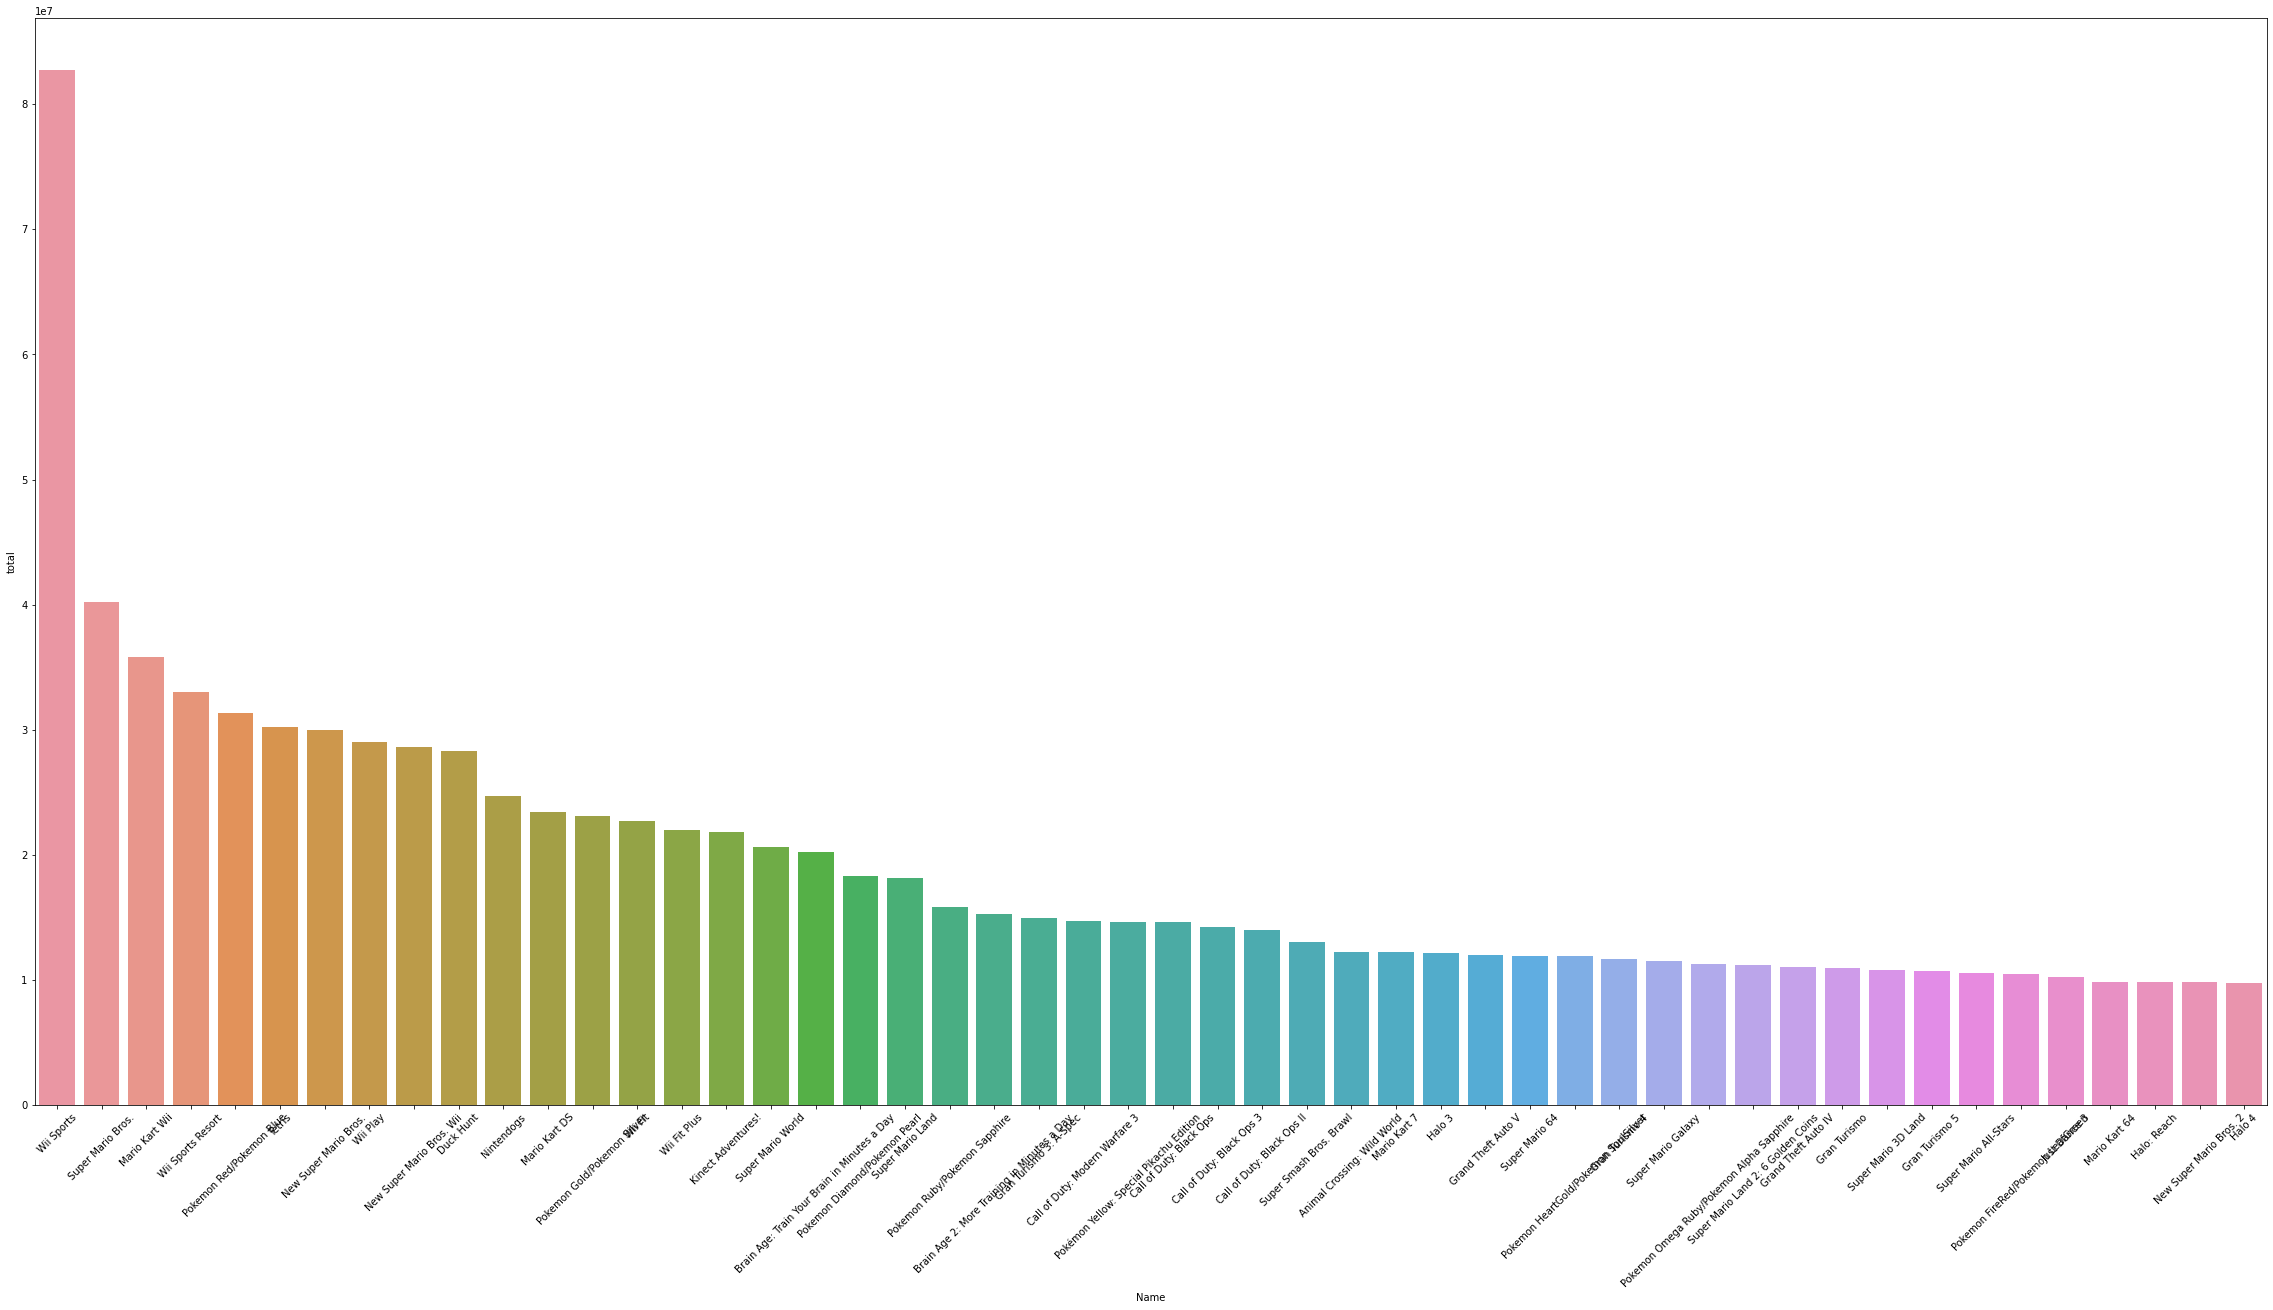

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

plt.figure(figsize = (40,20))
plt.xticks(rotation = 45)
sns.barplot(x = 'Name', y = 'total', data = df_largest_50);

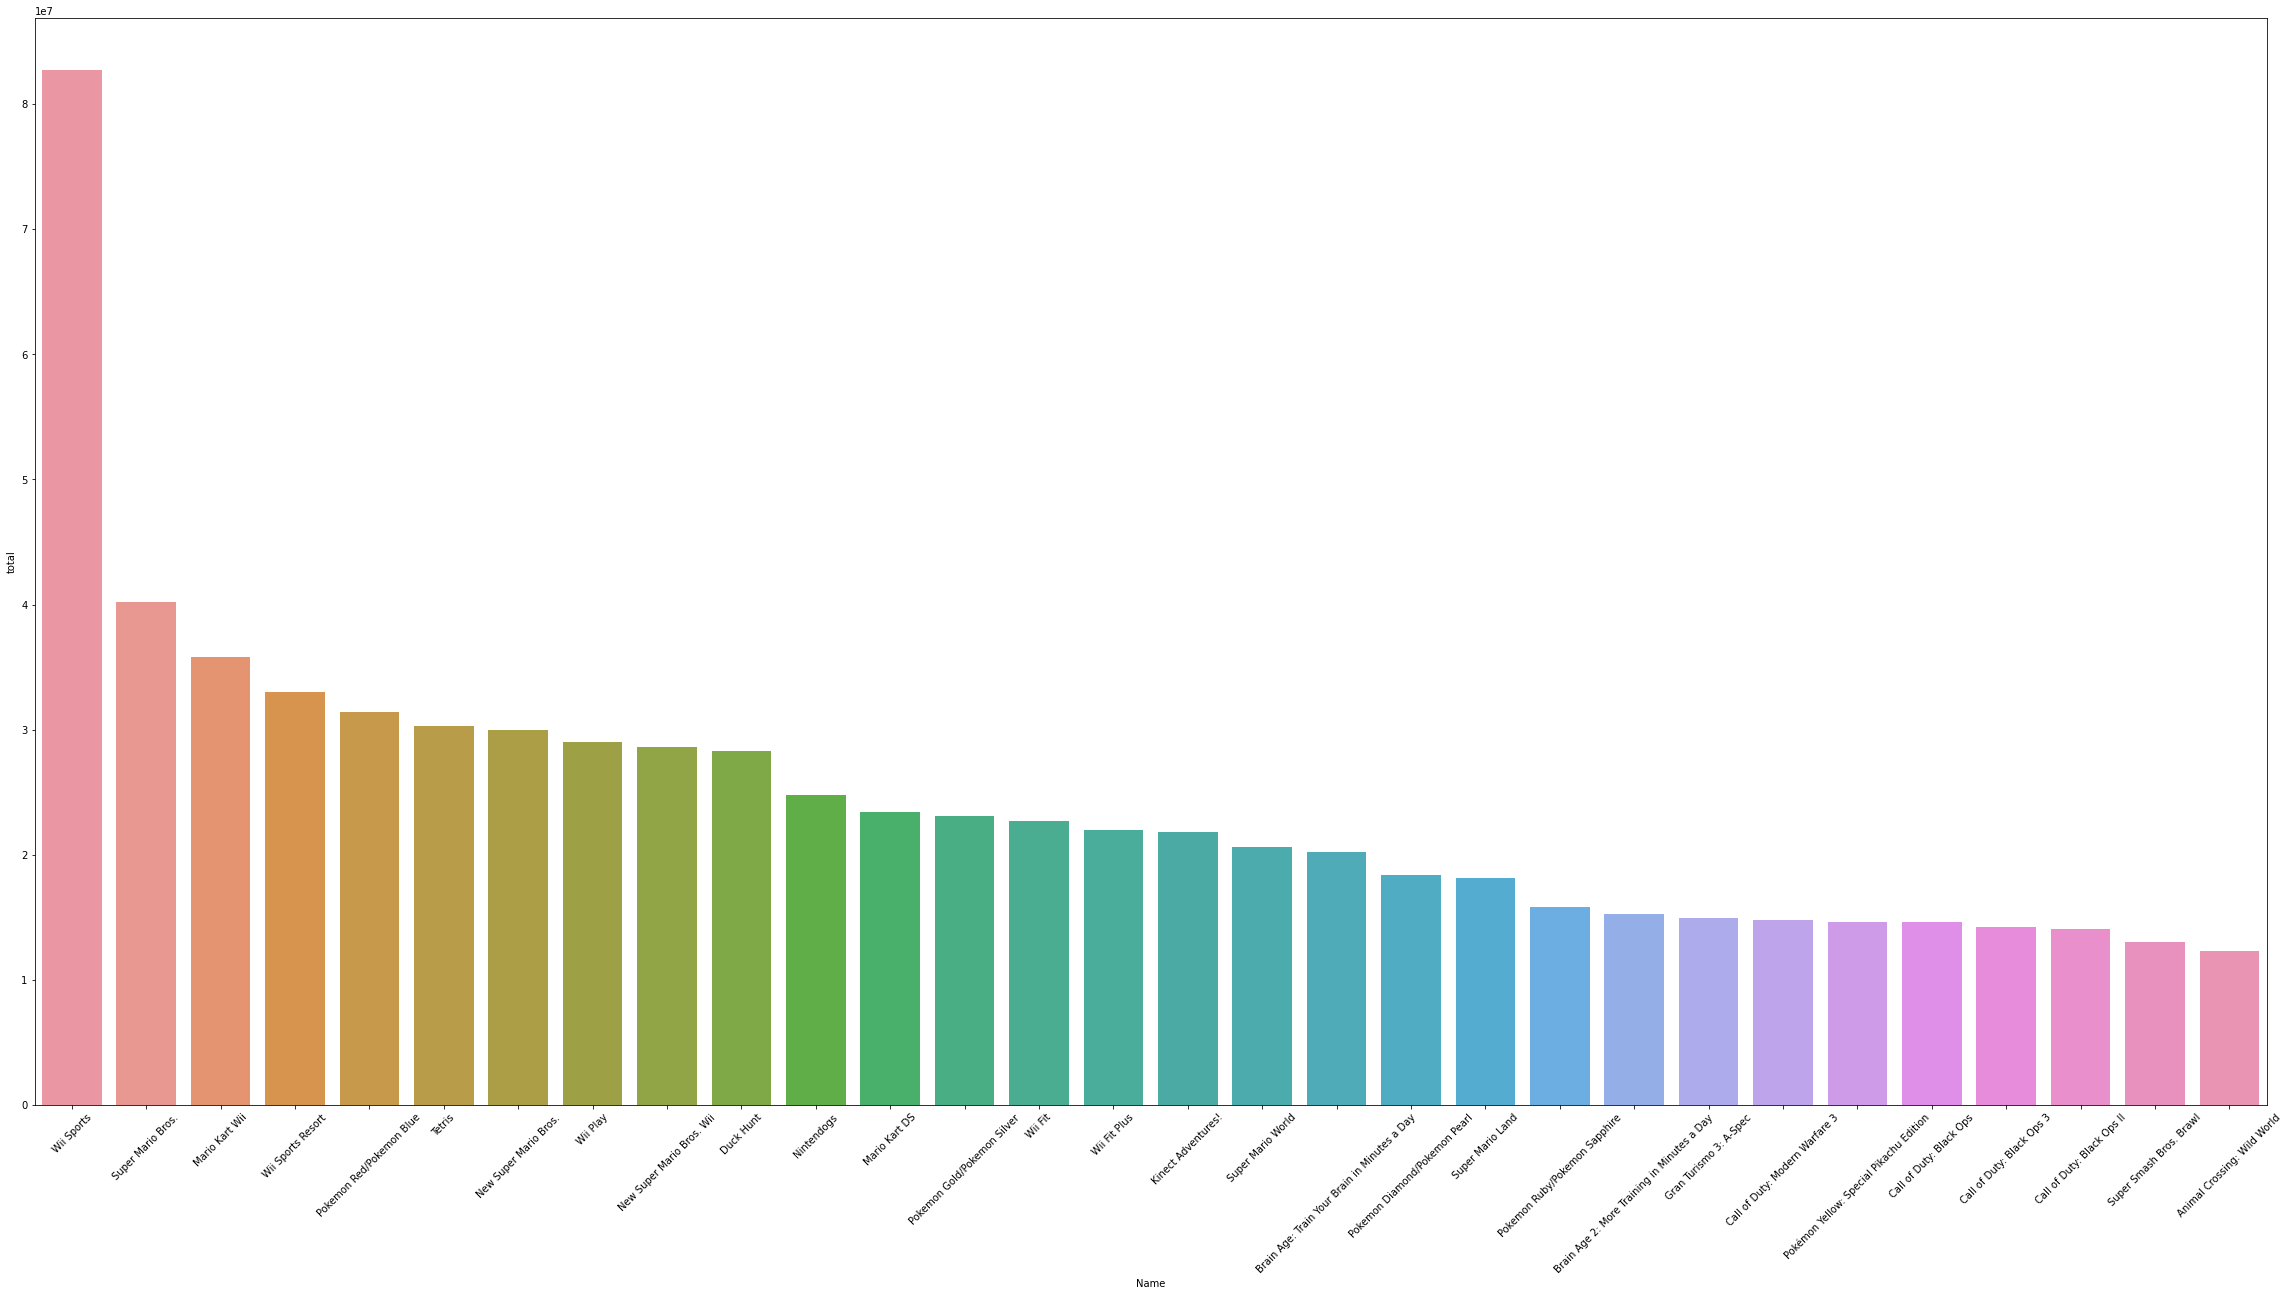

In [ ]:
plt.figure(figsize = (40,20))
plt.xticks(rotation = 45)
sns.barplot(x = 'Name', y = 'total', data = df_largest_30);

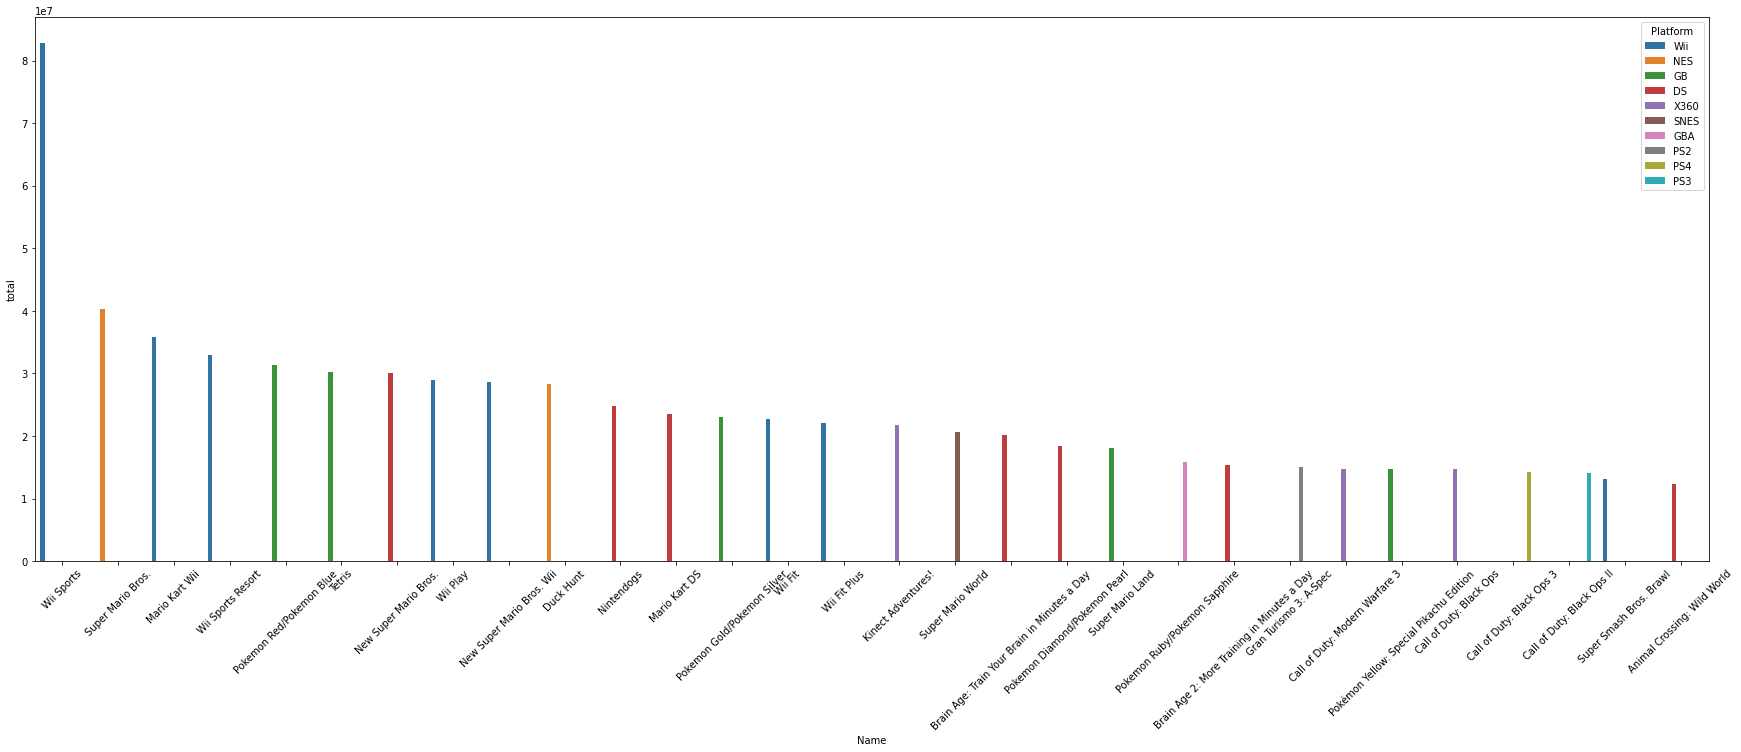

In [ ]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 45)
sns.barplot( x = 'Name', y = 'total', hue = 'Platform', data = df_largest_30);

In [ ]:
#Year이 total에 영향을 준다? /// pvalue 값 0 - > 귀무가설 기각 안함

from scipy import stats

stats.ttest_ind(df['Year'], df['total'])

Ttest_indResult(statistic=-31.597231112334917, pvalue=1.959738556046701e-214)

## 그렇다면 어떤 게임을 설계해야할까?

1. 연도를 오름차순 정리 최근 platform과 장르 고려
- 연도에 따라 트렌드가 다르기 때문
- 플랫폼도 고려해서 생각해보자
2. 어느 지역을 타겟으로 할 것인지
- 먼저 1번 분석 후 장르 결정
- 그 장르로 새로운 시장을 공략해볼 것인지 아니면 위에 분석대로 그 장르가 흥할 수 있는 시장을 타겟으로 할 것인지 결정
- 만약 새로운 시장을 공략한다면, 이전 그 시장의 최고매출 장르를 고려해 두 장르를 섞은 새로운 장르로 설계하는 것도 새로운 방법이 될 수 있음

## 연도와 플랫폼 연관이 있을까?

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
11233,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0,90000.0
11234,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0,130000.0
11235,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0
11236,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,20000.0,0.0,20000.0


In [ ]:
df_platform_sorted = df.sort_values(['Year','Platform']).reset_index()

In [ ]:
df_platform_sorted['Platform'].unique()

array(['2600', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'NG', 'SCD',
       '3DO', 'PS', 'SAT', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'GBA',
       'PS2', 'XB', 'GC', 'PSP', 'X360', 'PS3', 'Wii', '3DS', 'PSV',
       'WiiU', 'PS4', 'XOne'], dtype=object)

In [ ]:
df_platform = df_platform_sorted.groupby(['Year','Platform'])
df_platform.head()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,4737,Asteroids,2600,1980,Shooter,Atari,4000000.0,260000.0,0.0,50000.0,4310000.0
1,4896,Kaboom!,2600,1980,Misc,Activision,1070000.0,70000.0,0.0,10000.0,1150000.0
2,5874,Checkers,2600,1980,Misc,Atari,220000.0,10000.0,0.0,0.0,230000.0
3,7110,Bridge,2600,1980,Misc,Activision,250000.0,20000.0,0.0,0.0,270000.0
4,9425,Freeway,2600,1980,Action,Activision,320000.0,20000.0,0.0,0.0,340000.0
...,...,...,...,...,...,...,...,...,...,...,...
11219,1970,Teenage Mutant Ninja Turtles: Mutants in Manha...,XOne,2016,Action,Activision,20000.0,10000.0,0.0,0.0,30000.0
11220,2149,Mirror's Edge Catalyst,XOne,2016,Platform,Electronic Arts,80000.0,50000.0,0.0,20000.0,150000.0
11235,7672,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
11236,4440,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0


In [ ]:
df_platform_count = pd.DataFrame(df_platform['Platform'].count())

In [ ]:
df_platform_count

Platform
Year Platform          
1980 2600             5
1981 2600            43
1982 2600            32
1983 2600            11
     NES              5
...                 ...
2016 X360             6
     XOne            19
2017 PS4              1
     PSV              1
2020 DS               1

[233 rows x 1 columns]

In [ ]:
platform_ex1 = df.sort_values(['Platform']).reset_index()

In [ ]:
#Platform 별 total 구하기
ait = df.sort_values(['Year','Platform']).reset_index()

In [ ]:
go = ait[['Year','Platform','total']]
go

,Year,Platform,total
0,1980,2600,4310000.0
1,1980,2600,1150000.0
2,1980,2600,230000.0
3,1980,2600,270000.0
4,1980,2600,340000.0
...,...,...,...
11233,2016,XOne,20000.0
11234,2016,XOne,40000.0
11235,2017,PS4,30000.0
11236,2017,PSV,10000.0


In [ ]:
go['Platform'][0]

'2600'

In [ ]:
range(len(go))


range(0, 11238)

In [ ]:
go['Year'][0] >= 1980

True

In [ ]:
1 + (go['total'][0])

4310001.0

In [ ]:
sum_1980s_2600 = 0
sum_1980s_3DO = 0
sum_1980s_3DS = 0
sum_1980s_DC = 0
sum_1980s_DS = 0
sum_1980s_GB = 0
sum_1980s_GBA = 0
sum_1980s_GC = 0
sum_1980s_GEN = 0
sum_1980s_GG = 0
sum_1980s_N64 = 0
sum_1980s_NES = 0
sum_1980s_NG = 0
sum_1980s_PC = 0
sum_1980s_PCFX = 0
sum_1980s_PS = 0
sum_1980s_PS2 = 0
sum_1980s_PS3 = 0
sum_1980s_PS4 = 0
sum_1980s_PSP = 0
sum_1980s_PSV = 0
sum_1980s_SAT = 0
sum_1980s_SCD = 0
sum_1980s_SNES = 0
sum_1980s_TG16 = 0
sum_1980s_WS = 0
sum_1980s_Wii = 0
sum_1980s_WiiU = 0
sum_1980s_X360 = 0
sum_1980s_XB = 0
sum_1980s_XOne = 0

for k in range(len(go)):
  if 1980 <= go['Year'][k] < 1990 :
    if go['Platform'][k] == '2600' :
      sum_1980s_2600 = sum_1980s_2600 + go['total'][k]
    elif go['Platform'][k] == '3DO' :
      sum_1980s_3DO = sum_1980s_3DO + go['total'][k]
    elif go['Platform'][k] == '3DS' :
      sum_1980s_3DS = sum_1980s_3DS + go['total'][k]
    elif go['Platform'][k] == 'DC' :
      sum_1980s_DC = sum_1980s_DC + go['total'][k]
    elif go['Platform'][k] == 'DS' :
      sum_1980s_DS = sum_1980s_DS + go['total'][k]
    elif go['Platform'][k] == 'GB' :
      sum_1980s_GB = sum_1980s_GB + go['total'][k]
    elif go['Platform'][k] == 'GBA' :
      sum_1980s_GBA = sum_1980s_GBA + go['total'][k]
    elif go['Platform'][k] == 'GC' :
      sum_1980s_GC = sum_1980s_GC + go['total'][k]
    elif go['Platform'][k] == 'GEN' :
      sum_1980s_GEN = sum_1980s_GEN + go['total'][k]
    elif go['Platform'][k] == 'GG' :
      sum_1980s_GG = sum_1980s_GG + go['total'][k]
    elif go['Platform'][k] == 'N64' :
      sum_1980s_N64 = sum_1980s_N64 + go['total'][k]
    elif go['Platform'][k] == 'NES' :
      sum_1980s_NES = sum_1980s_NES + go['total'][k]
    elif go['Platform'][k] == 'NG' :
      sum_1980s_NG = sum_1980s_NG + go['total'][k]
    elif go['Platform'][k] == 'PC' :
      sum_1980s_PC = sum_1980s_PC + go['total'][k]
    elif go['Platform'][k] == 'PCFX' :
      sum_1980s_PCFX = sum_1980s_PCFX + go['total'][k]
    elif go['Platform'][k] == 'PS' :
      sum_1980s_PS = sum_1980s_PS + go['total'][k]
    elif go['Platform'][k] == 'PS2' :
      sum_1980s_PS2 = sum_1980s_PS2 + go['total'][k]
    elif go['Platform'][k] == 'PS3' :
      sum_1980s_PS3 = sum_1980s_PS3 + go['total'][k]
    elif go['Platform'][k] == 'PS4' :
      sum_1980s_PS4 = sum_1980s_PS4 + go['total'][k]
    elif go['Platform'][k] == 'PSP' :
      sum_1980s_PSP = sum_1980s_PSP + go['total'][k]
    elif go['Platform'][k] == 'PSV' :
      sum_1980s_PSV = sum_1980s_PSV + go['total'][k]
    elif go['Platform'][k] == 'SAT' :
      sum_1980s_SAT = sum_1980s_SAT + go['total'][k]
    elif go['Platform'][k] == 'SCD' :
      sum_1980s_SCD = sum_1980s_SCD + go['total'][k]
    elif go['Platform'][k] == 'SNES' :
      sum_1980s_SNES = sum_1980s_SNES + go['total'][k]
    elif go['Platform'][k] == 'TG16' :
      sum_1980s_TG16 = sum_1980s_TG16 + go['total'][k]
    elif go['Platform'][k] == 'WS' :
      sum_1980s_WS = sum_1980s_WS + go['total'][k]
    elif go['Platform'][k] == 'Wii' :
      sum_1980s_Wii = sum_1980s_Wii + go['total'][k]
    elif go['Platform'][k] == 'WiiU' :
      sum_1980s_WiiU = sum_1980s_WiiU + go['total'][k]
    elif go['Platform'][k] == 'X360' :
      sum_1980s_X360 = sum_1980s_X360 + go['total'][k]
    elif go['Platform'][k] == 'XB' :
      sum_1980s_XB = sum_1980s_XB + go['total'][k]
    elif go['Platform'][k] == 'XOne' :
      sum_1980s_XOne = sum_1980s_Wii + go['total'][k]
    


In [ ]:
sum_1980s = pd.DataFrame([[65180000.0],
 [0],
 [0],
 [0],
 [20000.0],
 [53910000.0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [186270000.0],
 [0],
 [40000.0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]])

In [ ]:
sum_1980s = sum_1980s.T

In [ ]:
sum_1980s.columns = ['sum_1980s_2600',
'sum_1980s_3DO', 
'sum_1980s_3DS',
'sum_1980s_DC',
'sum_1980s_DS',
'sum_1980s_GB',
'sum_1980s_GBA', 
'sum_1980s_GC',
'sum_1980s_GEN', 
'sum_1980s_GG',
'sum_1980s_N64', 
'sum_1980s_NES',
'sum_1980s_NG',
'sum_1980s_PC',
'sum_1980s_PCFX', 
'sum_1980s_PS', 
'sum_1980s_PS2', 
'sum_1980s_PS3', 
'sum_1980s_PS4', 
'sum_1980s_PSP', 
'sum_1980s_PSV', 
'sum_1980s_SAT', 
'sum_1980s_SCD', 
'sum_1980s_SNES', 
'sum_1980s_TG16', 
'sum_1980s_WS', 
'sum_1980s_Wii', 
'sum_1980s_WiiU', 
'sum_1980s_X360', 
'sum_1980s_XB', 
'sum_1980s_XOne'] 

In [ ]:
sum_1980s = sum_1980s.T
sum_1980s 

,0
sum_1980s_2600,65180000.0
sum_1980s_3DO,0.0
sum_1980s_3DS,0.0
sum_1980s_DC,0.0
sum_1980s_DS,20000.0
sum_1980s_GB,53910000.0
sum_1980s_GBA,0.0
sum_1980s_GC,0.0
sum_1980s_GEN,0.0
sum_1980s_GG,0.0


In [ ]:
sum_1990s_2600 = 0
sum_1990s_3DO = 0
sum_1990s_3DS = 0
sum_1990s_DC = 0
sum_1990s_DS = 0
sum_1990s_GB = 0
sum_1990s_GBA = 0
sum_1990s_GC = 0
sum_1990s_GEN = 0
sum_1990s_GG = 0
sum_1990s_N64 = 0
sum_1990s_NES = 0
sum_1990s_NG = 0
sum_1990s_PC = 0
sum_1990s_PCFX = 0
sum_1990s_PS = 0
sum_1990s_PS2 = 0
sum_1990s_PS3 = 0
sum_1990s_PS4 = 0
sum_1990s_PSP = 0
sum_1990s_PSV = 0
sum_1990s_SAT = 0
sum_1990s_SCD = 0
sum_1990s_SNES = 0
sum_1990s_TG16 = 0
sum_1990s_WS = 0
sum_1990s_Wii = 0
sum_1990s_WiiU = 0
sum_1990s_X360 = 0
sum_1990s_XB = 0
sum_1990s_XOne = 0

for k in range(len(go)):
  if 1990 <= go['Year'][k] < 2000 :
    if go['Platform'][k] == '2600' :
      sum_1990s_2600 = sum_1990s_2600 + go['total'][k]
    elif go['Platform'][k] == '3DO' :
      sum_1990s_3DO = sum_1990s_3DO + go['total'][k]
    elif go['Platform'][k] == '3DS' :
      sum_1990s_3DS = sum_1990s_3DS + go['total'][k]
    elif go['Platform'][k] == 'DC' :
      sum_1990s_DC = sum_1990s_DC + go['total'][k]
    elif go['Platform'][k] == 'DS' :
      sum_1990s_DS = sum_1990s_DS + go['total'][k]
    elif go['Platform'][k] == 'GB' :
      sum_1990s_GB = sum_1990s_GB + go['total'][k]
    elif go['Platform'][k] == 'GBA' :
      sum_1990s_GBA = sum_1990s_GBA + go['total'][k]
    elif go['Platform'][k] == 'GC' :
      sum_1990s_GC = sum_1990s_GC + go['total'][k]
    elif go['Platform'][k] == 'GEN' :
      sum_1990s_GEN = sum_1990s_GEN + go['total'][k]
    elif go['Platform'][k] == 'GG' :
      sum_1990s_GG = sum_1990s_GG + go['total'][k]
    elif go['Platform'][k] == 'N64' :
      sum_1990s_N64 = sum_1990s_N64 + go['total'][k]
    elif go['Platform'][k] == 'NES' :
      sum_1990s_NES = sum_1990s_NES + go['total'][k]
    elif go['Platform'][k] == 'NG' :
      sum_1990s_NG = sum_1990s_NG + go['total'][k]
    elif go['Platform'][k] == 'PC' :
      sum_1990s_PC = sum_1990s_PC + go['total'][k]
    elif go['Platform'][k] == 'PCFX' :
      sum_1990s_PCFX = sum_1990s_PCFX + go['total'][k]
    elif go['Platform'][k] == 'PS' :
      sum_1990s_PS = sum_1990s_PS + go['total'][k]
    elif go['Platform'][k] == 'PS2' :
      sum_1990s_PS2 = sum_1990s_PS2 + go['total'][k]
    elif go['Platform'][k] == 'PS3' :
      sum_1990s_PS3 = sum_1990s_PS3 + go['total'][k]
    elif go['Platform'][k] == 'PS4' :
      sum_1990s_PS4 = sum_1990s_PS4 + go['total'][k]
    elif go['Platform'][k] == 'PSP' :
      sum_1990s_PSP = sum_1990s_PSP + go['total'][k]
    elif go['Platform'][k] == 'PSV' :
      sum_1990s_PSV = sum_1990s_PSV + go['total'][k]
    elif go['Platform'][k] == 'SAT' :
      sum_1990s_SAT = sum_1990s_SAT + go['total'][k]
    elif go['Platform'][k] == 'SCD' :
      sum_1990s_SCD = sum_1990s_SCD + go['total'][k]
    elif go['Platform'][k] == 'SNES' :
      sum_1990s_SNES = sum_1990s_SNES + go['total'][k]
    elif go['Platform'][k] == 'TG16' :
      sum_1990s_TG16 = sum_1990s_TG16 + go['total'][k]
    elif go['Platform'][k] == 'WS' :
      sum_1990s_WS = sum_1990s_WS + go['total'][k]
    elif go['Platform'][k] == 'Wii' :
      sum_1990s_Wii = sum_1990s_Wii + go['total'][k]
    elif go['Platform'][k] == 'WiiU' :
      sum_1990s_WiiU = sum_1990s_WiiU + go['total'][k]
    elif go['Platform'][k] == 'X360' :
      sum_1990s_X360 = sum_1990s_X360 + go['total'][k]
    elif go['Platform'][k] == 'XB' :
      sum_1990s_XB = sum_1990s_XB + go['total'][k]
    elif go['Platform'][k] == 'XOne' :
      sum_1990s_XOne = sum_1990s_Wii + go['total'][k]
  else:
    continue

In [ ]:
sum_1990s = [sum_1990s_2600,
sum_1990s_3DO,
sum_1990s_3DS,
sum_1990s_DC,
sum_1990s_DS,
sum_1990s_GB ,
sum_1990s_GBA,
sum_1990s_GC,
sum_1990s_GEN,
sum_1990s_GG, 
sum_1990s_N64,
sum_1990s_NES,
sum_1990s_NG,
sum_1990s_PC,
sum_1990s_PCFX, 
sum_1990s_PS, 
sum_1990s_PS2,
sum_1990s_PS3,
sum_1990s_PS4,
sum_1990s_PSP,
sum_1990s_PSV,
sum_1990s_SAT,
sum_1990s_SCD ,
sum_1990s_SNES,
sum_1990s_TG16,
sum_1990s_WS,
sum_1990s_Wii,
sum_1990s_WiiU,
sum_1990s_X360,
sum_1990s_XB,
sum_1990s_XOne] 

In [ ]:
sum_1990s

[0,
 100000.0,
 0,
 8120000.0,
 0,
 147930000.0,
 0,
 0,
 16610000.0,
 40000.0,
 158520000.0,
 27540000.0,
 1380000.0,
 27910000.0,
 30000.0,
 523370000.0,
 0,
 0,
 0,
 0,
 0,
 27630000.0,
 1860000.0,
 167780000.0,
 160000.0,
 460000.0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
sum_1990s = pd.DataFrame([[0,
 100000.0,
 0,
 8120000.0,
 0,
 147930000.0,
 0,
 0,
 16610000.0,
 40000.0,
 158520000.0,
 27540000.0,
 1380000.0,
 27910000.0,
 30000.0,
 523370000.0,
 0,
 0,
 0,
 0,
 0,
 27630000.0,
 1860000.0,
 167780000.0,
 160000.0,
 460000.0,
 0,
 0,
 0,
 0,
 0]], columns = ['sum_1990s_2600',
'sum_1990s_3DO',
'sum_1990s_3DS',
'sum_1990s_DC',
'sum_1990s_DS',
'sum_1990s_GB' ,
'sum_1990s_GBA',
'sum_1990s_GC',
'sum_1990s_GEN',
'sum_1990s_GG', 
'sum_1990s_N64',
'sum_1990s_NES',
'sum_1990s_NG',
'sum_1990s_PC',
'sum_1990s_PCFX', 
'sum_1990s_PS', 
'sum_1990s_PS2',
'sum_1990s_PS3',
'sum_1990s_PS4',
'sum_1990s_PSP',
'sum_1990s_PSV',
'sum_1990s_SAT',
'sum_1990s_SCD' ,
'sum_1990s_SNES',
'sum_1990s_TG16',
'sum_1990s_WS',
'sum_1990s_Wii',
'sum_1990s_WiiU',
'sum_1990s_X360',
'sum_1990s_XB',
'sum_1990s_XOne'])

In [ ]:
sum_1990s = sum_1990s.T

In [ ]:
sum_1990s

,0
sum_1990s_2600,0.0
sum_1990s_3DO,100000.0
sum_1990s_3DS,0.0
sum_1990s_DC,8120000.0
sum_1990s_DS,0.0
sum_1990s_GB,147930000.0
sum_1990s_GBA,0.0
sum_1990s_GC,0.0
sum_1990s_GEN,16610000.0
sum_1990s_GG,40000.0


In [ ]:
go['Year'][5555]

2007

In [ ]:
sum_2000s_2600 = 0
sum_2000s_3DO= 0
sum_2000s_3DS= 0
sum_2000s_DC= 0
sum_2000s_DS= 0
sum_2000s_GB= 0
sum_2000s_GBA= 0
sum_2000s_GC= 0
sum_2000s_GEN= 0
sum_2000s_GG= 0
sum_2000s_N64= 0
sum_2000s_NES= 0
sum_2000s_NG= 0
sum_2000s_PC= 0
sum_2000s_PCFX = 0
sum_2000s_PS= 0
sum_2000s_PS2= 0
sum_2000s_PS3= 0
sum_2000s_PS4= 0
sum_2000s_PSP= 0
sum_2000s_PSV= 0
sum_2000s_SAT= 0
sum_2000s_SCD= 0
sum_2000s_SNES= 0
sum_2000s_TG16= 0
sum_2000s_WS= 0
sum_2000s_Wii= 0
sum_2000s_WiiU= 0
sum_2000s_X360= 0
sum_2000s_XB= 0
sum_2000s_XOne= 0

for k in range(len(go)):
  if 2000 <= go['Year'][k] < 2010 :
    if go['Platform'][k] == '2600' :
      sum_2000s_2600 = sum_2000s_2600 + go['total'][k]
    elif go['Platform'][k] == '3DO' :
      sum_2000s_3DO = sum_2000s_3DO + go['total'][k]
    elif go['Platform'][k] == '3DS' :
      sum_2000s_3DS = sum_2000s_3DS + go['total'][k]
    elif go['Platform'][k] == 'DC' :
      sum_2000s_DC = sum_2000s_DC + go['total'][k]
    elif go['Platform'][k] == 'DS' :
      sum_2000s_DS = sum_2000s_DS + go['total'][k]
    elif go['Platform'][k] == 'GB' :
      sum_2000s_GB = sum_2000s_GB + go['total'][k]
    elif go['Platform'][k] == 'GBA' :
      sum_2000s_GBA = sum_2000s_GBA + go['total'][k]
    elif go['Platform'][k] == 'GC' :
      sum_2000s_GC = sum_2000s_GC + go['total'][k]
    elif go['Platform'][k] == 'GEN' :
      sum_2000s_GEN = sum_2000s_GEN + go['total'][k]
    elif go['Platform'][k] == 'GG' :
      sum_2000s_GG = sum_2000s_GG + go['total'][k]
    elif go['Platform'][k] == 'N64' :
      sum_2000s_N64 = sum_2000s_N64 + go['total'][k]
    elif go['Platform'][k] == 'NES' :
      sum_2000s_NES = sum_2000s_NES + go['total'][k]
    elif go['Platform'][k] == 'NG' :
      sum_2000s_NG = sum_2000s_NG + go['total'][k]
    elif go['Platform'][k] == 'PC' :
      sum_2000s_PC = sum_2000s_PC + go['total'][k]
    elif go['Platform'][k] == 'PCFX' :
      sum_2000s_PCFX = sum_2000s_PCFX + go['total'][k]
    elif go['Platform'][k] == 'PS' :
      sum_2000s_PS = sum_2000s_PS + go['total'][k]
    elif go['Platform'][k] == 'PS2' :
      sum_2000s_PS2 = sum_2000s_PS2 + go['total'][k]
    elif go['Platform'][k] == 'PS3' :
      sum_2000s_PS3 = sum_2000s_PS3 + go['total'][k]
    elif go['Platform'][k] == 'PS4' :
      sum_2000s_PS4 = sum_2000s_PS4 + go['total'][k]
    elif go['Platform'][k] == 'PSP' :
      sum_2000s_PSP = sum_2000s_PSP + go['total'][k]
    elif go['Platform'][k] == 'PSV' :
      sum_2000s_PSV = sum_2000s_PSV + go['total'][k]
    elif go['Platform'][k] == 'SAT' :
      sum_2000s_SAT = sum_2000s_SAT + go['total'][k]
    elif go['Platform'][k] == 'SCD' :
      sum_2000s_SCD = sum_2000s_SCD + go['total'][k]
    elif go['Platform'][k] == 'SNES' :
      sum_2000s_SNES = sum_2000s_SNES + go['total'][k]
    elif go['Platform'][k] == 'TG16' :
      sum_2000s_TG16 = sum_2000s_TG16 + go['total'][k]
    elif go['Platform'][k] == 'WS' :
      sum_2000s_WS = sum_2000s_WS + go['total'][k]
    elif go['Platform'][k] == 'Wii' :
      sum_2000s_Wii = sum_2000s_Wii + go['total'][k]
    elif go['Platform'][k] == 'WiiU' :
      sum_2000s_WiiU = sum_2000s_WiiU + go['total'][k]
    elif go['Platform'][k] == 'X360' :
      sum_2000s_X360 = sum_2000s_X360 + go['total'][k]
    elif go['Platform'][k] == 'XB' :
      sum_2000s_XB = sum_2000s_XB + go['total'][k]
    elif go['Platform'][k] == 'XOne' :
      sum_2000s_XOne = sum_2000s_Wii + go['total'][k]
  else:
    continue

In [ ]:
sum_2020s = [sum_2000s_2600,
sum_2000s_3DO,
sum_2000s_3DS,
sum_2000s_DC,
sum_2000s_DS,
sum_2000s_GB ,
sum_2000s_GBA,
sum_2000s_GC,
sum_2000s_GEN,
sum_2000s_GG, 
sum_2000s_N64,
sum_2000s_NES,
sum_2000s_NG,
sum_2000s_PC,
sum_2000s_PCFX, 
sum_2000s_PS, 
sum_2000s_PS2,
sum_2000s_PS3,
sum_2000s_PS4,
sum_2000s_PSP,
sum_2000s_PSV,
sum_2000s_SAT,
sum_2000s_SCD ,
sum_2000s_SNES,
sum_2000s_TG16,
sum_2000s_WS,
sum_2000s_Wii,
sum_2000s_WiiU,
sum_2000s_X360,
sum_2000s_XB,
sum_2000s_XOne]

In [ ]:
sum_2020s

[0,
 0,
 0,
 6780000.0,
 582890000.0,
 24100000.0,
 245500000.0,
 131660000.0,
 0,
 0,
 30050000.0,
 0,
 0,
 69180000.0,
 0,
 110180000.0,
 667640000.0,
 170120000.0,
 0,
 145880000.0,
 0,
 0,
 0,
 0,
 0,
 710000.0,
 531670000.0,
 0,
 193410000.0,
 119720000.0,
 0]

In [ ]:
sum_2000s = pd.DataFrame([[0,
 0,
 0,
 6780000.0,
 582890000.0,
 24100000.0,
 245500000.0,
 131660000.0,
 0,
 0,
 30050000.0,
 0,
 0,
 69180000.0,
 0,
 110180000.0,
 667640000.0,
 170120000.0,
 0,
 145880000.0,
 0,
 0,
 0,
 0,
 0,
 710000.0,
 531670000.0,
 0,
 193410000.0,
 119720000.0,
 0]], columns = ['sum_2000s_2600',
'sum_2000s_3DO',
'sum_2000s_3DS',
'sum_2000s_DC',
'sum_2000s_DS',
'sum_2000s_GB' ,
'sum_2000s_GBA',
'sum_2000s_GC',
'sum_2000s_GEN',
'sum_2000s_GG', 
'sum_2000s_N64',
'sum_2000s_NES',
'sum_2000s_NG',
'sum_2000s_PC',
'sum_2000s_PCFX', 
'sum_2000s_PS', 
'sum_2000s_PS2',
'sum_2000s_PS3',
'sum_2000s_PS4',
'sum_2000s_PSP',
'sum_2000s_PSV',
'sum_2000s_SAT',
'sum_2000s_SCD' ,
'sum_2000s_SNES',
'sum_2000s_TG16',
'sum_2000s_WS',
'sum_2000s_Wii',
'sum_2000s_WiiU',
'sum_2000s_X360',
'sum_2000s_XB',
'sum_2000s_XOne'])

In [ ]:
sum_2000s = sum_2000s.T

In [ ]:
sum_2000s

,0
sum_2000s_2600,0.0
sum_2000s_3DO,0.0
sum_2000s_3DS,0.0
sum_2000s_DC,6780000.0
sum_2000s_DS,582890000.0
sum_2000s_GB,24100000.0
sum_2000s_GBA,245500000.0
sum_2000s_GC,131660000.0
sum_2000s_GEN,0.0
sum_2000s_GG,0.0


In [ ]:
sum_2010s_2600 = 0
sum_2010s_3DO= 0
sum_2010s_3DS= 0
sum_2010s_DC= 0
sum_2010s_DS= 0
sum_2010s_GB= 0
sum_2010s_GBA= 0
sum_2010s_GC= 0
sum_2010s_GEN= 0
sum_2010s_GG= 0
sum_2010s_N64= 0
sum_2010s_NES= 0
sum_2010s_NG= 0
sum_2010s_PC= 0
sum_2010s_PCFX = 0
sum_2010s_PS= 0
sum_2010s_PS2= 0
sum_2010s_PS3= 0
sum_2010s_PS4= 0
sum_2010s_PSP= 0
sum_2010s_PSV= 0
sum_2010s_SAT= 0
sum_2010s_SCD= 0
sum_2010s_SNES= 0
sum_2010s_TG16= 0
sum_2010s_WS= 0
sum_2010s_Wii= 0
sum_2010s_WiiU= 0
sum_2010s_X360= 0
sum_2010s_XB= 0
sum_2010s_XOne= 0

for k in range(len(go)):
  if  go['Year'][k] >= 2010 :
    if go['Platform'][k] == '2600' :
      sum_2010s_2600 = sum_2010s_2600 + go['total'][k]
    elif go['Platform'][k] == '3DO' :
      sum_2010s_3DO = sum_2010s_3DO + go['total'][k]
    elif go['Platform'][k] == '3DS' :
      sum_2010s_3DS = sum_2010s_3DS + go['total'][k]
    elif go['Platform'][k] == 'DC' :
      sum_2010s_DC = sum_2010s_DC + go['total'][k]
    elif go['Platform'][k] == 'DS' :
      sum_2010s_DS = sum_2010s_DS + go['total'][k]
    elif go['Platform'][k] == 'GB' :
      sum_2010s_GB = sum_2010s_GB + go['total'][k]
    elif go['Platform'][k] == 'GBA' :
      sum_2010s_GBA = sum_2010s_GBA + go['total'][k]
    elif go['Platform'][k] == 'GC' :
      sum_2010s_GC = sum_2010s_GC + go['total'][k]
    elif go['Platform'][k] == 'GEN' :
      sum_2010s_GEN = sum_2010s_GEN + go['total'][k]
    elif go['Platform'][k] == 'GG' :
      sum_2010s_GG = sum_2010s_GG + go['total'][k]
    elif go['Platform'][k] == 'N64' :
      sum_2010s_N64 = sum_2010s_N64 + go['total'][k]
    elif go['Platform'][k] == 'NES' :
      sum_2010s_NES = sum_2010s_NES + go['total'][k]
    elif go['Platform'][k] == 'NG' :
      sum_2010s_NG = sum_2010s_NG + go['total'][k]
    elif go['Platform'][k] == 'PC' :
      sum_2010s_PC = sum_2010s_PC + go['total'][k]
    elif go['Platform'][k] == 'PCFX' :
      sum_2010s_PCFX = sum_2010s_PCFX + go['total'][k]
    elif go['Platform'][k] == 'PS' :
      sum_2010s_PS = sum_2010s_PS + go['total'][k]
    elif go['Platform'][k] == 'PS2' :
      sum_2010s_PS2 = sum_2010s_PS2 + go['total'][k]
    elif go['Platform'][k] == 'PS3' :
      sum_2010s_PS3 = sum_2010s_PS3 + go['total'][k]
    elif go['Platform'][k] == 'PS4' :
      sum_2010s_PS4 = sum_2010s_PS4 + go['total'][k]
    elif go['Platform'][k] == 'PSP' :
      sum_2010s_PSP = sum_2010s_PSP + go['total'][k]
    elif go['Platform'][k] == 'PSV' :
      sum_2010s_PSV = sum_2010s_PSV + go['total'][k]
    elif go['Platform'][k] == 'SAT' :
      sum_2010s_SAT = sum_2010s_SAT + go['total'][k]
    elif go['Platform'][k] == 'SCD' :
      sum_2010s_SCD = sum_2010s_SCD + go['total'][k]
    elif go['Platform'][k] == 'SNES' :
      sum_2010s_SNES = sum_2010s_SNES + go['total'][k]
    elif go['Platform'][k] == 'TG16' :
      sum_2010s_TG16 = sum_2010s_TG16 + go['total'][k]
    elif go['Platform'][k] == 'WS' :
      sum_2010s_WS = sum_2010s_WS + go['total'][k]
    elif go['Platform'][k] == 'Wii' :
      sum_2010s_Wii = sum_2010s_Wii + go['total'][k]
    elif go['Platform'][k] == 'WiiU' :
      sum_2010s_WiiU = sum_2010s_WiiU + go['total'][k]
    elif go['Platform'][k] == 'X360' :
      sum_2010s_X360 = sum_2010s_X360 + go['total'][k]
    elif go['Platform'][k] == 'XB' :
      sum_2010s_XB = sum_2010s_XB + go['total'][k]
    elif go['Platform'][k] == 'XOne' :
      sum_2010s_XOne = sum_2010s_Wii + go['total'][k]

In [ ]:
sum_2010s = [sum_2010s_2600,
sum_2010s_3DO,
sum_2010s_3DS,
sum_2010s_DC,
sum_2010s_DS,
sum_2010s_GB ,
sum_2010s_GBA,
sum_2010s_GC,
sum_2010s_GEN,
sum_2010s_GG, 
sum_2010s_N64,
sum_2010s_NES,
sum_2010s_NG,
sum_2010s_PC,
sum_2010s_PCFX, 
sum_2010s_PS, 
sum_2010s_PS2,
sum_2010s_PS3,
sum_2010s_PS4,
sum_2010s_PSP,
sum_2010s_PSV,
sum_2010s_SAT,
sum_2010s_SCD ,
sum_2010s_SNES,
sum_2010s_TG16,
sum_2010s_WS,
sum_2010s_Wii,
sum_2010s_WiiU,
sum_2010s_X360,
sum_2010s_XB,
sum_2010s_XOne]

In [ ]:
sum_2010s

[0,
 0,
 198510000.0,
 0,
 82140000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70800000.0,
 0,
 0,
 2560000.0,
 233180000.0,
 113570000.0,
 44600000.0,
 34980000.0,
 0,
 0,
 0,
 0,
 0,
 125000000.0,
 60600000.0,
 236240000.0,
 0,
 125040000.0]

In [ ]:
sum_2010s = pd.DataFrame([[0,
 0,
 198510000.0,
 0,
 82140000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70800000.0,
 0,
 0,
 2560000.0,
 233180000.0,
 113570000.0,
 44600000.0,
 34980000.0,
 0,
 0,
 0,
 0,
 0,
 125000000.0,
 60600000.0,
 236240000.0,
 0,
 125040000.0]], columns = ['sum_2010s_2600',
'sum_2010s_3DO',
'sum_2010s_3DS',
'sum_2010s_DC',
'sum_2010s_DS',
'sum_2010s_GB' ,
'sum_2010s_GBA',
'sum_2010s_GC',
'sum_2010s_GEN',
'sum_2010s_GG', 
'sum_2010s_N64',
'sum_2010s_NES',
'sum_2010s_NG',
'sum_2010s_PC',
'sum_2010s_PCFX', 
'sum_2010s_PS', 
'sum_2010s_PS2',
'sum_2010s_PS3',
'sum_2010s_PS4',
'sum_2010s_PSP',
'sum_2010s_PSV',
'sum_2010s_SAT',
'sum_2010s_SCD' ,
'sum_2010s_SNES',
'sum_2010s_TG16',
'sum_2010s_WS',
'sum_2010s_Wii',
'sum_2010s_WiiU',
'sum_2010s_X360',
'sum_2010s_XB',
'sum_2010s_XOne'])

In [ ]:
sum_2010s = sum_2010s.T

In [ ]:
sum_2010s

,0
sum_2010s_2600,0.0
sum_2010s_3DO,0.0
sum_2010s_3DS,198510000.0
sum_2010s_DC,0.0
sum_2010s_DS,82140000.0
sum_2010s_GB,0.0
sum_2010s_GBA,0.0
sum_2010s_GC,0.0
sum_2010s_GEN,0.0
sum_2010s_GG,0.0


In [ ]:
print(sum_1980s.nlargest(3, columns = 0))
print(sum_1990s.nlargest(3, columns = 0))
print(sum_2000s.nlargest(3, columns = 0))
print(sum_2010s.nlargest(3, columns = 0))

                          0
sum_1980s_NES   186270000.0
sum_1980s_2600   65180000.0
sum_1980s_GB     53910000.0
                          0
sum_1990s_PS    523370000.0
sum_1990s_SNES  167780000.0
sum_1990s_N64   158520000.0
                         0
sum_2000s_PS2  667640000.0
sum_2000s_DS   582890000.0
sum_2000s_Wii  531670000.0
                          0
sum_2010s_X360  236240000.0
sum_2010s_PS3   233180000.0
sum_2010s_3DS   198510000.0


1980년대에는 NES, 2600, GB

1990년대에는 PC, SNES, N64

2000년대에는 PS2, DS, Will

2010년대에는 X360, PS3, 3DS 가 유행하였다.

In [ ]:
print(sum_1980s.nlargest(8, columns = 0))
print(sum_1990s.nlargest(8, columns = 0))
print(sum_2000s.nlargest(8, columns = 0))
print(sum_2010s.nlargest(8, columns = 0))

                          0
sum_1980s_NES   186270000.0
sum_1980s_2600   65180000.0
sum_1980s_GB     53910000.0
sum_1980s_PC        40000.0
sum_1980s_DS        20000.0
sum_1980s_3DO           0.0
sum_1980s_3DS           0.0
sum_1980s_DC            0.0
                          0
sum_1990s_PS    523370000.0
sum_1990s_SNES  167780000.0
sum_1990s_N64   158520000.0
sum_1990s_GB    147930000.0
sum_1990s_PC     27910000.0
sum_1990s_SAT    27630000.0
sum_1990s_NES    27540000.0
sum_1990s_GEN    16610000.0
                          0
sum_2000s_PS2   667640000.0
sum_2000s_DS    582890000.0
sum_2000s_Wii   531670000.0
sum_2000s_GBA   245500000.0
sum_2000s_X360  193410000.0
sum_2000s_PS3   170120000.0
sum_2000s_PSP   145880000.0
sum_2000s_GC    131660000.0
                          0
sum_2010s_X360  236240000.0
sum_2010s_PS3   233180000.0
sum_2010s_3DS   198510000.0
sum_2010s_XOne  125040000.0
sum_2010s_Wii   125000000.0
sum_2010s_PS4   113570000.0
sum_2010s_DS     82140000.0
sum_2010s_PC     708

In [ ]:
sum_1980s_reset = sum_1980s.reset_index()

In [ ]:
sum_1980s_reset.columns = ['platform','total']

In [ ]:
sum_1980s_reset

,platform,total
0,sum_1980s_2600,65180000.0
1,sum_1980s_3DO,0.0
2,sum_1980s_3DS,0.0
3,sum_1980s_DC,0.0
4,sum_1980s_DS,20000.0
5,sum_1980s_GB,53910000.0
6,sum_1980s_GBA,0.0
7,sum_1980s_GC,0.0
8,sum_1980s_GEN,0.0
9,sum_1980s_GG,0.0


In [ ]:
sum_1990s_reset = sum_1990s.reset_index()
sum_1990s_reset.columns = ['platform','total']

sum_2000s_reset = sum_2000s.reset_index()
sum_2000s_reset.columns = ['platform','total']

sum_2010s_reset = sum_2010s.reset_index()
sum_2010s_reset.columns = ['platform','total']

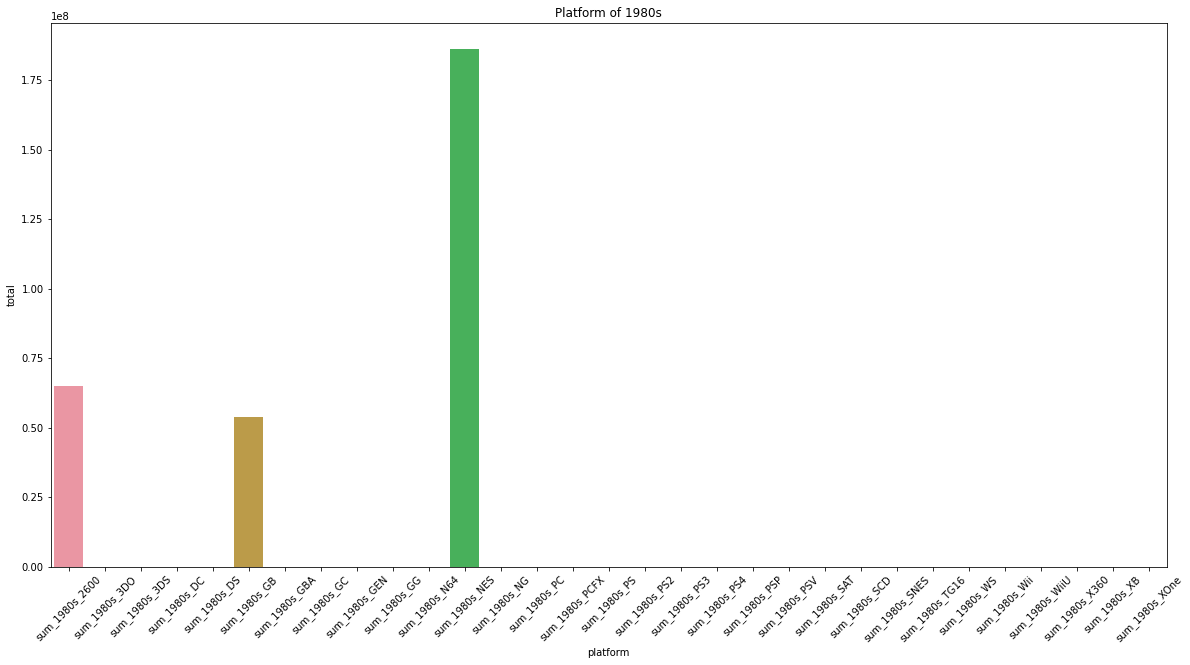

In [ ]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
sns.barplot(x = 'platform', y = 'total', data = sum_1980s_reset).set_title('Platform of 1980s');

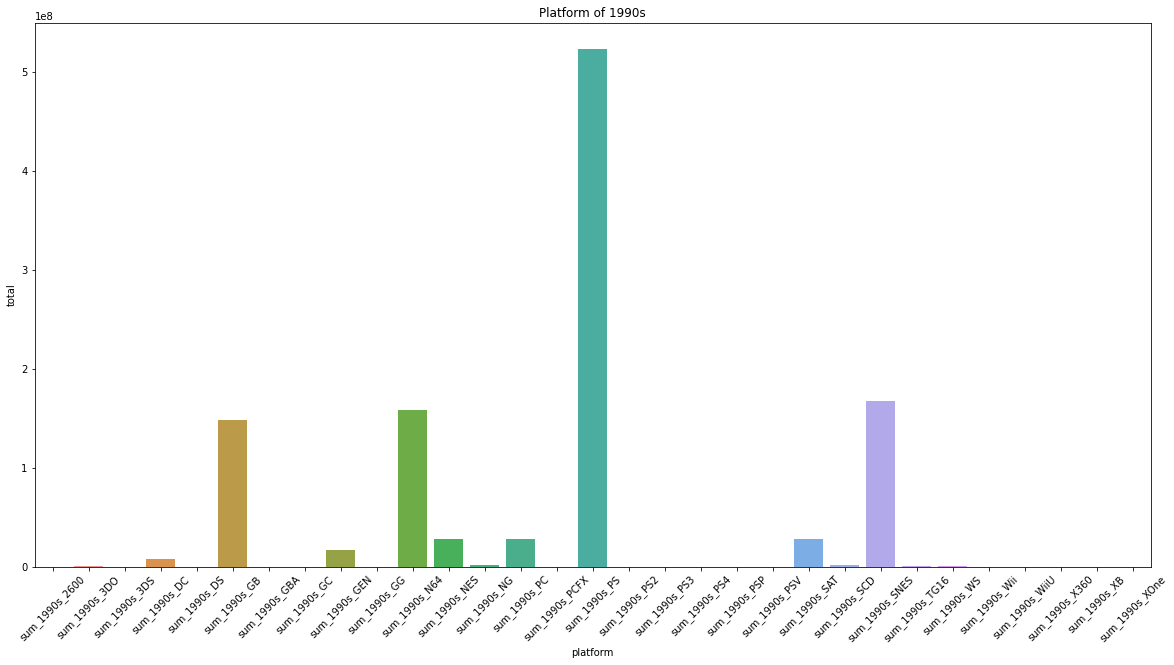

In [ ]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
sns.barplot(x = 'platform', y = 'total', data = sum_1990s_reset).set_title('Platform of 1990s');

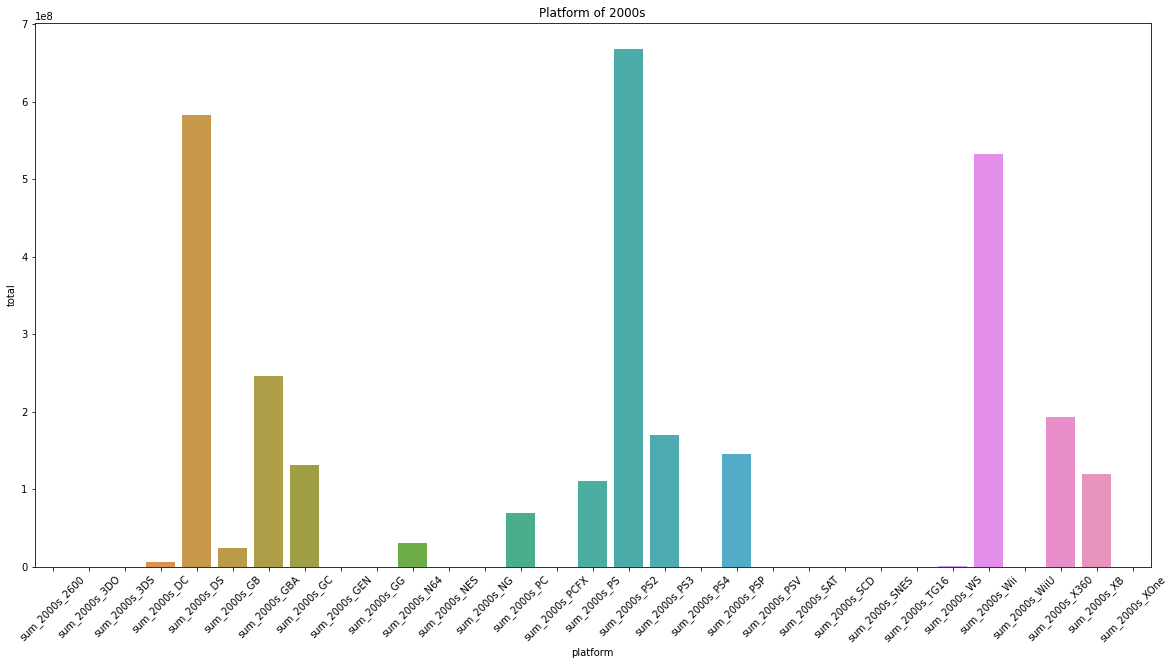

In [ ]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
sns.barplot(x = 'platform', y = 'total', data = sum_2000s_reset).set_title('Platform of 2000s');

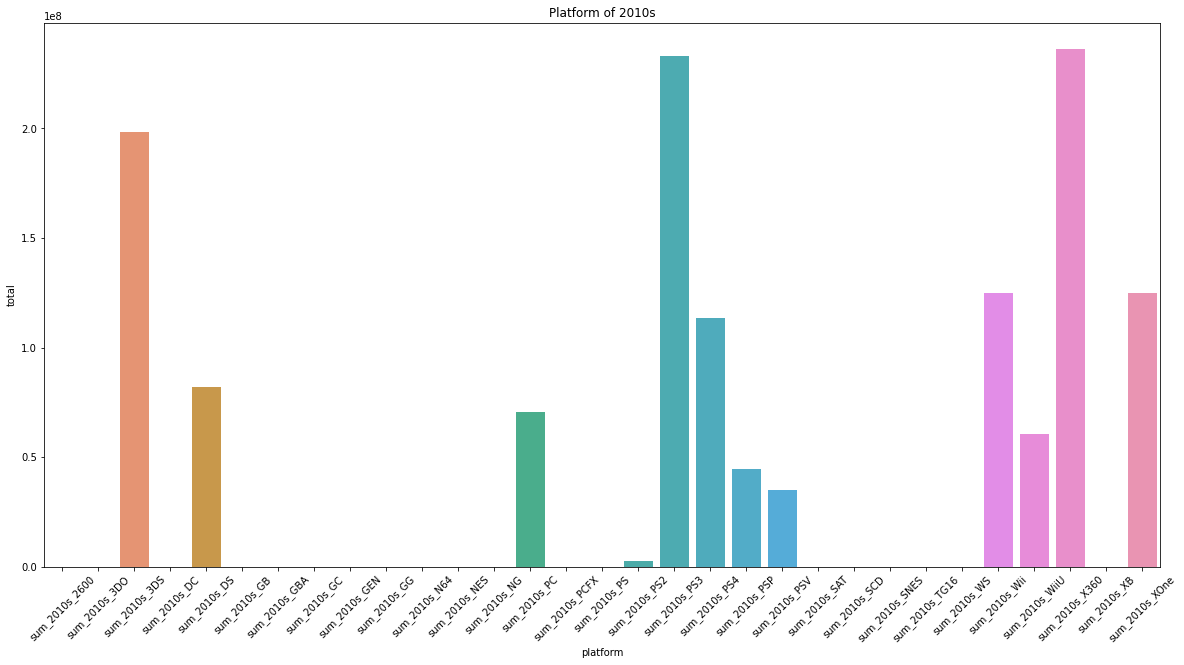

In [ ]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 45)
sns.barplot(x = 'platform', y = 'total', data = sum_2010s_reset).set_title('Platform of 2010s');

연도를 10년 단위로 나누어 보았을 때, 한번도 플랫폼 점유율 1위가 10년 뒤 순위 안에 없는 것을 확인할 수 있음

따라서, Action 장르의 PS5 게임을 출시하고자한다. Action 장르를 선택하게 된 이유는, 앞선 자료에서 확인할 수 있듯이, 30년동안 Action은 부동의 1위이며, 크게 변동할 일이 없을 것 같다. 

PS5 게임으로 정한 이유는 이전 자료에서도 볼 수 있듯이 플레이스테이션의 인기는 식을 줄 모른다. PS 가 출시된 이후부터 꾸준히 PS1, PS2, PS3의 점유율은 상당하다. 2021년인 지금 과거 자료를 토대로 내릴 수 있는 결정은 플레이스테이션용 게임을 설계할 것임.

In [ ]:
platform_total = df.groupby(['Platform'], as_index = False)['total'].sum()

In [ ]:
df_platform_total = pd.DataFrame(platform_total)
df_platform_total

,Platform,total
0,2600,65180000.0
1,3DO,100000.0
2,3DS,198510000.0
3,DC,14900000.0
4,DS,665050000.0
5,GB,225940000.0
6,GBA,245500000.0
7,GC,131660000.0
8,GEN,16610000.0
9,GG,40000.0


In [ ]:
df_platform_total_10 = df_platform_total.nlargest(10, columns = 'total')

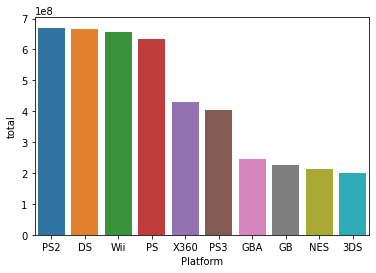

In [ ]:
sns.barplot(x = 'Platform', y = 'total', data = df_platform_total_10);

## ?

**그렇다면, 어떤 시장을 공략해볼 것인가?**

게임 설계가 처음인 입장에서 섣부른 도전은 실패를 불러올 수 있기 때문에, 분석한 자룔를 토대로 결정하고자 한다.

장르를 Action으로 정함으로써 출고량이 압도적인 북미시장뿐만 아니라, 유럽, 일본, 기타 국가들까지 모두 노려볼 수 있다.

이번 게임 설계가 성공적을로 마쳐 베타버전을 출시하게 된다면, 다음 게임으로는 Action이 아닌 비주류 장르를 선택해 서브컬쳐를 저격한 게임을 설계하고자 한다.